# Week 7 -- Analysis

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [80]:
no_games = 7

## Functions

In [81]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [82]:
def per_week(dataframe, column1, no_games):
    dataframe[column1 + '_pG'] = dataframe[column1]/no_games

In [83]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [84]:
def print_metric_team(dataframe, metric, team_inx):
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [85]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [86]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

## Read in DataFrames

In [121]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [122]:
print(offense.shape)
offense.head()

(531, 36)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7
0,Kyler Murray,ARI,QB,23,7,7,169,253,1847,13,7,65,437,13.20,7,0,0,0,0.00,0,2,1,7,0,0,202.60,1,1,202.50,27.30,33.10,24.70,23.10,27.30,28.90,38.10
1,Alvin Kamara,NOR,RB,25,6,5,0,0,0,0,0,75,364,12.50,4,53,46,460,10.00,3,0,0,7,0,0,147.40,1,2,124.40,18.70,29.40,31.70,17.90,11.90,0.00,14.80
2,Derrick Henry,TEN,RB,26,6,6,0,0,0,0,0,143,663,10.40,7,17,10,81,9.00,0,0,0,7,0,0,121.40,2,3,116.40,13.10,8.40,25.00,0.00,18.30,38.40,13.20
3,Russell Wilson,SEA,QB,32,6,6,156,219,1890,22,6,29,237,9.70,0,0,0,0,0.00,0,1,0,0,0,1,183.30,2,4,183.30,31.80,34.40,36.80,21.90,25.50,0.00,32.90
4,Calvin Ridley,ATL,WR,26,7,7,0,0,0,0,0,3,14,10.70,0,64,40,615,18.80,6,0,0,6,1,0,120.90,1,5,100.90,24.90,22.90,11.70,0.00,13.60,12.90,14.90


In [123]:
print(defense.shape)
defense.head()

(32, 31)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7
0,Baltimore Ravens,6,104,397,5.10,2039,143,654,4.60,4,232,5.50,149,10.50,1385,8,13,10,76.90,11,3,8,22,70.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00
1,Miami Dolphins,6,113,375,5.80,2161,149,745,5.00,8,209,6.30,130,12.00,1416,7,18,13,72.20,9,5,4,17,46.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00
2,Indianapolis Colts,6,115,358,4.80,1728,151,530,3.50,4,194,5.80,120,10.70,1198,7,15,10,66.70,10,10,0,13,61.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00
3,Pittsburgh Steelers,6,118,350,4.90,1718,122,413,3.40,4,202,5.70,118,12.50,1305,11,15,10,66.70,9,8,1,26,56.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00
4,Los Angeles Rams,7,124,445,4.90,2190,167,703,4.20,5,254,5.30,167,9.90,1487,8,21,12,57.10,8,6,2,24,53.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00


In [124]:
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [125]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
0,Baltimore Ravens,6,104,397,5.10,2039,143,654,4.60,4,232,5.50,149,10.50,1385,8,13,10,76.90,11,3,8,22,70.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,17.33,339.83,23.83,109.00,38.67,24.83,0.64,230.83,1.33,3.67,11.67
1,Miami Dolphins,6,113,375,5.80,2161,149,745,5.00,8,209,6.30,130,12.00,1416,7,18,13,72.20,9,5,4,17,46.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,18.83,360.17,24.83,124.17,34.83,21.67,0.62,236.00,1.17,2.83,7.67
2,Indianapolis Colts,6,115,358,4.80,1728,151,530,3.50,4,194,5.80,120,10.70,1198,7,15,10,66.70,10,10,0,13,61.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,19.17,288.00,25.17,88.33,32.33,20.00,0.62,199.67,1.17,2.17,10.17
3,Pittsburgh Steelers,6,118,350,4.90,1718,122,413,3.40,4,202,5.70,118,12.50,1305,11,15,10,66.70,9,8,1,26,56.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,19.67,286.33,20.33,68.83,33.67,19.67,0.58,217.50,1.83,4.33,9.33
4,Los Angeles Rams,7,124,445,4.90,2190,167,703,4.20,5,254,5.30,167,9.90,1487,8,21,12,57.10,8,6,2,24,53.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,17.71,312.86,23.86,100.43,36.29,23.86,0.66,212.43,1.14,3.43,7.57


In [126]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
0,Baltimore Ravens,6,104,397,5.10,2039,143,654,4.60,4,232,5.50,149,10.50,1385,8,13,10,76.90,11,3,8,22,70.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,17.33,339.83,23.83,109.00,38.67,24.83,0.64,230.83,1.33,3.67,11.67
1,Miami Dolphins,6,113,375,5.80,2161,149,745,5.00,8,209,6.30,130,12.00,1416,7,18,13,72.20,9,5,4,17,46.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,18.83,360.17,24.83,124.17,34.83,21.67,0.62,236.00,1.17,2.83,7.67
2,Indianapolis Colts,6,115,358,4.80,1728,151,530,3.50,4,194,5.80,120,10.70,1198,7,15,10,66.70,10,10,0,13,61.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,19.17,288.00,25.17,88.33,32.33,20.00,0.62,199.67,1.17,2.17,10.17
3,Pittsburgh Steelers,6,118,350,4.90,1718,122,413,3.40,4,202,5.70,118,12.50,1305,11,15,10,66.70,9,8,1,26,56.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,19.67,286.33,20.33,68.83,33.67,19.67,0.58,217.50,1.83,4.33,9.33
4,Los Angeles Rams,7,124,445,4.90,2190,167,703,4.20,5,254,5.30,167,9.90,1487,8,21,12,57.10,8,6,2,24,53.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,17.71,312.86,23.86,100.43,36.29,23.86,0.66,212.43,1.14,3.43,7.57


In [127]:
offense[offense['Player'] == "Ronald Jones II"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7
25,Ronald Jones II,TAM,RB,23,7,7,0,0,0,0,0,110,506,10.00,4,27,18,86,11.80,0,0,0,4,0,0,92.20,10,26,83.20,8.20,8.70,7.30,12.80,12.50,24.10,9.60


In [128]:
taken_wrt = ['Davante Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', "Le'Veon Bell", 
             'A.J. Brown', 'John Brown', 'Marquise Brown', 'DJ Chark', 'Nick Chubb', 'Chase Claypool', 'James Conner',
             'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 'Stefon Diggs', 'Kenyan Drake',  
             'Clyde Edwards-Helaire', 'Austen Ekeler', 'Ezekiel Elliott', 'Evan Engram', 'Zach Ertz', 'Mike Evans', 
             'Noah Fant', 'Will Fuller', 'Michael Gallup', 'Mike Gesicki', 'Antonio Gibson', 'Chris Godwin',
             'Kenny Golladay', 'Melvin Gordon', 'Todd Gurley', 'Hunter Henry', 'Tyler Higbee', 
             'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 
             'Josh Jacobs', 'David Johnson', 'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 'Travis Kelce', 
             'George Kittle', 'Cooper Kupp', 'CeeDee Lamb', 'Tyler Lockett', 'Christian McCaffrey',
             'Jerick McKinnon', 'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon', 'David Montgomery', 'D.J. Moore', 
             'Zack Moss', 'Raheem Mostert', 'DeVante Parker', 'Calvin Ridley', 'James Robinson', 'Allen Robinson', 
             'Miles Sanders', 'Devin Singletary', 'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 
             'Adam Thielen', 'Michael Thomas', 'Darren Waller', 'Robert Woods']


In [129]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Joe Burrow', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Baker Mayfield', 'Kyler Murray', 'Cam Newton', 'Ben Roethlisberger', 'Matt Ryan', 
             'Matthew Stafford', 'Ryan Tannehill', 'Deshaun Watson', 'Russell Wilson']

In [184]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', 'Matt Gay', 'Zane Gonzalez', 'Wil Lutz', 
           'Justin Tucker', 'Greg Zuerlein']

In [131]:
myteam_wrt = ['Robby Anderson', 'Tyler Boyd', 'Chris Carson', 'Jamison Crowder', 'Rob Gronkowski', 
              'Darrell Henderson', 'Derrick Henry', 'DeAndre Hopkins', 'Diontae Johnson', 'Julio Jones', 
              'Jonnu Smith']


## QB Analysis

In [132]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7
0,Kyler Murray,ARI,QB,23,7,7,169,253,1847,13,7,65,437,13.20,7,0,0,0,0.00,0,2,1,7,0,0,202.60,1,1,202.50,27.30,33.10,24.70,23.10,27.30,28.90,38.10
3,Russell Wilson,SEA,QB,32,6,6,156,219,1890,22,6,29,237,9.70,0,0,0,0,0.00,0,1,0,0,0,1,183.30,2,4,183.30,31.80,34.40,36.80,21.90,25.50,0.00,32.90
7,Patrick Mahomes,KAN,QB,25,7,7,159,242,1899,16,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,171.50,3,8,171.40,20.40,27.50,40.00,20.20,30.70,20.60,12.00
10,Josh Allen,BUF,QB,24,7,7,175,259,2018,16,4,48,204,6.50,3,0,0,0,0.00,0,4,4,3,0,0,171.10,4,11,171.10,28.20,34.50,32.20,25.40,18.30,16.10,16.40
20,Deshaun Watson,HOU,QB,25,7,7,166,239,2095,15,5,30,147,13.00,1,0,0,0,0.00,0,2,0,1,0,0,159.50,5,21,159.60,21.80,15.70,18.10,20.90,26.90,32.00,24.20


In [133]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [134]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
0,Kyler Murray,ARI,QB,23,7,7,169,253,1847,13,7,65,437,13.20,7,0,0,0,0.00,0,2,1,7,0,0,202.60,1,1,202.50,27.30,33.10,24.70,23.10,27.30,28.90,38.10,24.14,36.14,0.67,263.86,1.86,7.30,1.00,0.14,62.43,28.93
3,Russell Wilson,SEA,QB,32,6,6,156,219,1890,22,6,29,237,9.70,0,0,0,0,0.00,0,1,0,0,0,1,183.30,2,4,183.30,31.80,34.40,36.80,21.90,25.50,0.00,32.90,26.00,36.50,0.71,315.00,3.67,8.63,1.00,0.00,39.50,30.55
7,Patrick Mahomes,KAN,QB,25,7,7,159,242,1899,16,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,171.50,3,8,171.40,20.40,27.50,40.00,20.20,30.70,20.60,12.00,22.71,34.57,0.66,271.29,2.29,7.85,0.14,0.00,23.57,24.49
10,Josh Allen,BUF,QB,24,7,7,175,259,2018,16,4,48,204,6.50,3,0,0,0,0.00,0,4,4,3,0,0,171.10,4,11,171.10,28.20,34.50,32.20,25.40,18.30,16.10,16.40,25.00,37.00,0.68,288.29,2.29,7.79,0.57,0.57,29.14,24.44
20,Deshaun Watson,HOU,QB,25,7,7,166,239,2095,15,5,30,147,13.00,1,0,0,0,0.00,0,2,0,1,0,0,159.50,5,21,159.60,21.80,15.70,18.10,20.90,26.90,32.00,24.20,23.71,34.14,0.69,299.29,2.14,8.77,0.71,0.00,21.00,22.80


In [135]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
count,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,56.00,58.00,58.00,56.00,58.00,58.00,58.00,58.00
mean,28.76,4.45,3.67,84.07,127.74,942.36,6.31,3.00,14.67,66.86,6.52,0.88,0.22,0.17,0.81,0.65,0.02,1.72,0.71,0.90,0.03,0.38,71.63,71.53,10.74,11.26,10.96,10.46,9.09,9.04,10.00,15.54,23.95,0.66,171.80,1.08,7.03,0.58,0.14,11.43,12.63
std,5.33,2.21,2.86,68.05,101.04,775.55,6.23,2.68,14.47,95.62,5.01,1.45,0.84,0.50,4.00,3.20,0.13,1.71,1.11,1.48,0.18,0.79,63.01,62.99,10.66,12.17,11.21,11.11,10.53,10.80,12.35,9.55,14.18,0.15,111.50,0.96,2.51,0.48,0.22,15.06,9.20
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,0.00
25%,24.00,3.00,0.00,9.50,18.50,65.50,0.00,0.00,5.00,0.25,2.17,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,6.60,6.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.38,11.96,0.61,50.00,0.00,5.98,0.00,0.00,0.08,3.08
50%,27.50,5.00,4.50,88.50,138.50,954.00,4.50,3.00,10.50,27.00,6.60,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,63.40,63.40,11.20,10.20,11.80,6.75,3.85,2.20,2.35,17.73,28.48,0.66,200.14,1.07,6.98,0.59,0.00,6.83,13.89
75%,32.00,6.00,6.00,149.75,213.50,1647.25,11.75,4.75,22.50,111.00,10.55,1.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,0.75,128.60,128.60,19.40,19.57,18.43,20.77,18.12,17.23,18.17,23.61,35.04,0.69,265.00,1.83,7.98,1.00,0.19,18.31,19.38
max,43.00,7.00,7.00,195.00,293.00,2181.00,22.00,10.00,65.00,437.00,18.80,7.00,6.00,3.00,23.00,16.00,1.00,8.00,4.00,7.00,1.00,4.00,202.60,202.50,31.80,39.80,40.00,38.30,30.70,32.00,38.50,30.20,44.40,1.00,371.20,3.67,18.00,1.67,1.00,62.43,30.55


In [136]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
63,Aaron Rodgers,GNB,QB,37,6,6,137,208,1657,17,2,8,45,11.30,0,1,1,-6,-6.00,0,0,0,0,0,0,136.70,9,64,136.20,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.83,34.67,0.66,276.17,2.83,7.97,0.33,0.00,7.50,22.70
80,Justin Herbert,LAC,QB,22,5,5,124,184,1542,12,3,25,121,12.40,2,0,0,0,0.00,0,3,1,2,0,0,128.80,16,,128.80,0.00,23.20,15.70,24.00,27.40,0.00,38.50,24.80,36.80,0.67,308.40,2.40,8.38,0.60,0.20,24.20,25.76


In [137]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
46,Carson Wentz,PHI,QB,28,7,7,163,278,1760,10,10,35,185,7.90,5,0,0,0,0.00,0,5,2,5,0,4,152.90,7,47,152.90,15.00,14.40,23.50,22.40,19.40,29.40,28.80,23.29,39.71,0.59,251.43,1.43,6.33,1.43,0.29,26.43,21.84
63,Aaron Rodgers,GNB,QB,37,6,6,137,208,1657,17,2,8,45,11.30,0,1,1,-6,-6.00,0,0,0,0,0,0,136.70,9,64,136.20,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.83,34.67,0.66,276.17,2.83,7.97,0.33,0.00,7.50,22.70
79,Gardner Minshew II,JAX,QB,24,7,7,176,267,1855,13,5,25,122,12.80,1,1,1,0,0.00,0,4,3,1,0,1,135.90,13,,135.30,20.80,25.50,10.20,21.90,19.80,18.10,19.00,25.14,38.14,0.66,265.00,1.86,6.95,0.71,0.43,17.43,19.33
80,Justin Herbert,LAC,QB,22,5,5,124,184,1542,12,3,25,121,12.40,2,0,0,0,0.00,0,3,1,2,0,0,128.80,16,,128.80,0.00,23.20,15.70,24.00,27.40,0.00,38.50,24.80,36.80,0.67,308.40,2.40,8.38,0.60,0.20,24.20,25.76
82,Ryan Fitzpatrick,MIA,QB,38,6,6,138,197,1535,10,7,25,135,9.00,2,1,1,0,0.00,0,1,0,2,1,2,126.40,17,,125.80,8.40,24.30,24.20,23.30,27.60,18.00,0.00,23.00,32.83,0.70,255.83,1.67,7.79,1.17,0.00,22.50,20.97


In [138]:
available_qbs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'Week_7', 'CompletedPasses_pG', 'PassesAttempted_pG',
       'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
       'Interceptions_pG', 'LostFumbles_pG', 'RushingYds_pG', 'TTL_pG'],
      dtype='object')

In [139]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
           'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

for column in columns:
    scaled_qbs[column] = scaler.fit_transform(scaled_qbs[[column]])

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
46,Carson Wentz,PHI,QB,28,7,7,1.23,1.47,-0.35,1.15,0.90,6.33,1.71,0.70,2.31,21.84
63,Aaron Rodgers,GNB,QB,37,6,6,1.18,1.11,0.05,1.38,2.64,7.97,-0.37,-0.59,0.11,22.70
79,Gardner Minshew II,JAX,QB,24,7,7,1.43,1.36,0.05,1.28,1.43,6.95,0.35,1.34,1.27,19.33
80,Justin Herbert,LAC,QB,22,5,5,1.39,1.27,0.14,1.69,2.10,8.38,0.14,0.31,2.05,25.76
82,Ryan Fitzpatrick,MIA,QB,38,6,6,1.20,0.98,0.28,1.19,1.19,7.79,1.21,-0.59,1.86,20.97


In [140]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [141]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [142]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
80,Justin Herbert,LAC,QB,22,5,5,1.39,1.27,0.14,1.69,2.10,8.38,0.14,0.31,2.05,25.76,42.33
63,Aaron Rodgers,GNB,QB,37,6,6,1.18,1.11,0.05,1.38,2.64,7.97,-0.37,-0.59,0.11,22.70,38.10
82,Ryan Fitzpatrick,MIA,QB,38,6,6,1.20,0.98,0.28,1.19,1.19,7.79,1.21,-0.59,1.86,20.97,34.83
46,Carson Wentz,PHI,QB,28,7,7,1.23,1.47,-0.35,1.15,0.90,6.33,1.71,0.70,2.31,21.84,32.48
84,Derek Carr,LVR,QB,29,6,6,1.45,1.15,0.39,1.49,1.81,8.18,-0.37,2.40,0.27,19.40,32.12


In [143]:
qb1 = 63
qb2 = 80

Avg PassingYds_pG: 171.8
Aaron Rodgers PassingYds_pG: 276.17
--------------------------------------------------
Avg PassingYds_pG: 171.8
Justin Herbert PassingYds_pG: 308.4
--------------------------------------------------


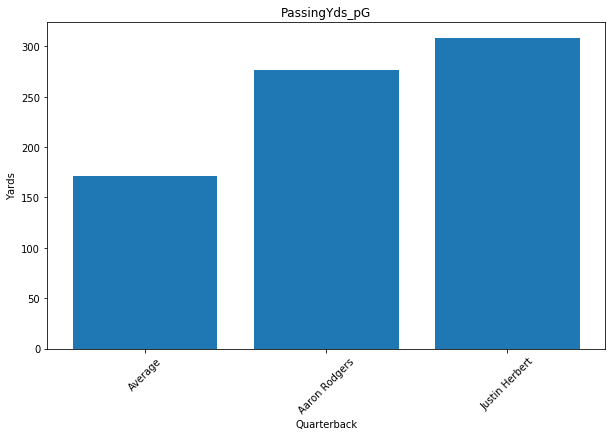

In [144]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg PassesAttempted_pG: 23.95
Aaron Rodgers PassesAttempted_pG: 34.67
--------------------------------------------------
Avg PassesAttempted_pG: 23.95
Justin Herbert PassesAttempted_pG: 36.8
--------------------------------------------------


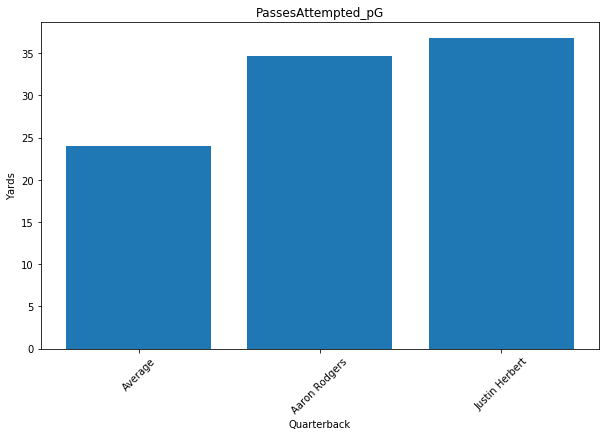

In [145]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.66
Aaron Rodgers Completion_Percent: 0.66
--------------------------------------------------
Avg Completion_Percent: 0.66
Justin Herbert Completion_Percent: 0.67
--------------------------------------------------


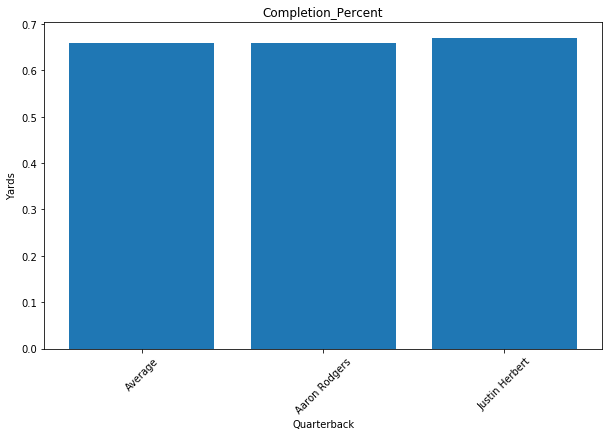

In [146]:
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

Avg RushingYds_pG: 11.43
Aaron Rodgers RushingYds_pG: 7.5
--------------------------------------------------
Avg RushingYds_pG: 11.43
Justin Herbert RushingYds_pG: 24.2
--------------------------------------------------


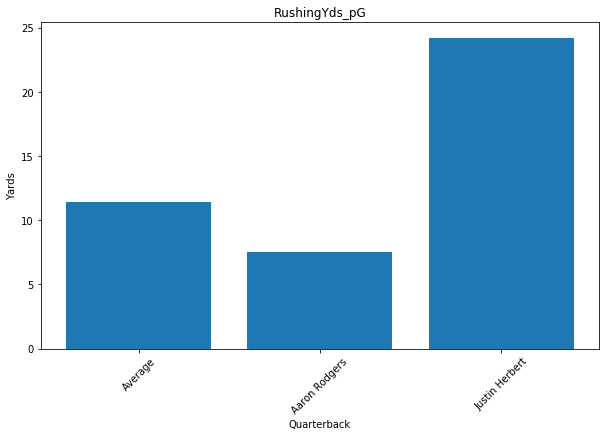

In [147]:
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

Week 7 match ups:
    
    Green Bay vs Minnesota
    Los Angeles Chargers vs Denver
 

In [148]:
qb_opp = ['Minnesota Vikings', 'Denver Broncos']

In [149]:
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
12,Denver Broncos,6,153,388,5.20,2035,152,654,4.30,5,218,5.90,144,10.50,1381,8,21,10,47.60,6,3,3,18,30.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,25.50,339.17,25.33,109.00,36.33,24.00,0.66,230.17,1.33,3.00,5.00
22,Minnesota Vikings,6,192,409,6.10,2482,185,762,4.10,5,211,7.70,144,12.40,1720,14,23,12,52.20,5,3,2,13,13.00,-4.00,3.00,2.00,5.00,6.00,0.00,0.00,32.00,413.67,30.83,127.00,35.17,24.00,0.68,286.67,2.33,2.17,2.17


In [150]:
def1 = 22
def2 = 12

Avg RZ_Percent: 62.83
Minnesota Vikings RZ_Percent: 52.2
--------------------------------------------------
Avg RZ_Percent: 62.83
Denver Broncos RZ_Percent: 47.6
--------------------------------------------------


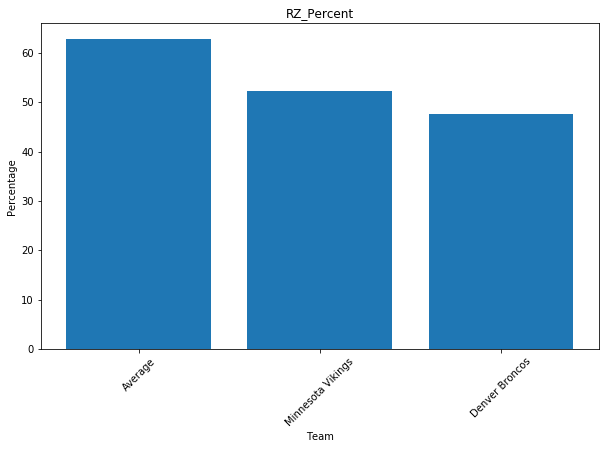

In [151]:
average, minnesota, vikings = print_metric_team(defense, 'RZ_Percent', def1)
average, denver, broncos = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', minnesota, denver]
y = [average, vikings, broncos]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Passing_Yds_pG: 246.24
Minnesota Vikings Passing_Yds_pG: 286.67
--------------------------------------------------
Avg Passing_Yds_pG: 246.24
Denver Broncos Passing_Yds_pG: 230.17
--------------------------------------------------


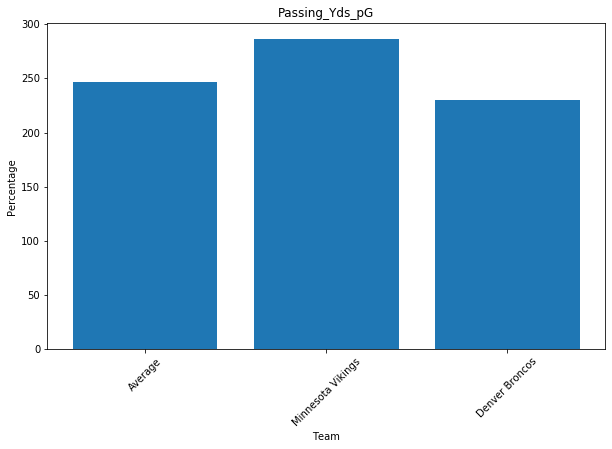

In [152]:
average, minnesota, vikings = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, denver, broncos = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', minnesota, denver]
y = [average, vikings, broncos]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Percentage')

Avg Passing_TDs_pG: 1.76
Minnesota Vikings Passing_TDs_pG: 2.33
--------------------------------------------------
Avg Passing_TDs_pG: 1.76
Denver Broncos Passing_TDs_pG: 1.33
--------------------------------------------------


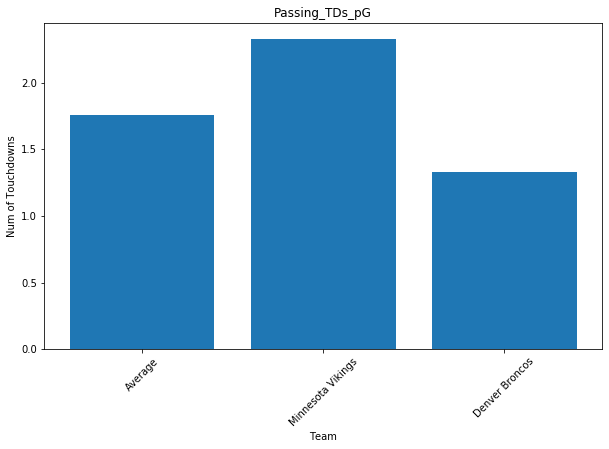

In [153]:
average, minnesota, vikings = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, denver, broncos = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', minnesota, denver]
y = [average, vikings, broncos]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Let's talk defense. Rodgers is going up against the Vikings who have allowed 287 yards per game and 2.3 touchdowns per game. The Vikings also just traded their best pass rusher. Herbert on the other hand is facing th Broncos who have given up only 230 yards per game in the air and 1.3 touchdowns per game. Opponents have only scored in the red zone 47.6% of the time compared to the Vikings who have allowed 52.2% of RZ attempts to score. Herbert is a dynamic quarterback and takes advantage of his athleticism to get first downs, but I do think he'll have a harder time coming up.

## Runningbacks

In [149]:
runningbacks = offense[offense['Position'] == 'RB']

In [150]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [151]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Alvin Kamara,NOR,RB,25,5,4,0,0,0,0,0,61,281,10.10,4,45,38,395,13.90,3,0,0,7,0,0,128.60,1,1,109.60,18.70,29.40,31.70,17.90,11.90,0.00,12.20,56.20,9.00,7.60,0.80,0.60,0.00
1,Derrick Henry,TEN,RB,26,5,5,0,0,0,0,0,123,588,11.80,6,15,8,84,15.00,0,0,0,6,0,0,107.20,2,2,103.20,13.10,8.40,25.00,0.00,18.30,38.40,24.60,117.60,3.00,1.60,1.20,0.00,0.00
4,Dalvin Cook,MIN,RB,25,5,5,0,0,0,0,0,92,489,8.20,7,16,12,64,8.30,0,1,1,7,3,0,107.30,3,5,101.30,20.80,15.10,23.90,26.60,14.90,0.00,18.40,97.80,3.20,2.40,1.40,0.00,0.20
6,Aaron Jones,GNB,RB,26,5,5,0,0,0,0,0,75,389,6.90,5,28,18,161,17.40,2,1,0,7,0,0,106.00,4,7,97.00,13.60,41.60,14.60,17.10,0.00,10.10,15.00,77.80,5.60,3.60,1.00,0.40,0.00
10,Ezekiel Elliott,DAL,RB,25,6,6,0,0,0,0,0,101,413,4.90,5,42,32,204,9.80,1,5,4,6,1,0,107.70,5,11,91.70,24.70,16.20,11.80,12.50,22.50,4.00,16.83,68.83,7.00,5.33,0.83,0.17,0.67


In [152]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
1,Derrick Henry,TEN,RB,26,5,5,0,0,0,0,0,123,588,11.80,6,15,8,84,15.00,0,0,0,6,0,0,107.20,2,2,103.20,13.10,8.40,25.00,0.00,18.30,38.40,24.60,117.60,3.00,1.60,1.20,0.00,0.00
20,Chris Carson,SEA,RB,26,5,5,0,0,0,0,0,61,289,11.40,3,23,21,140,12.70,3,1,0,6,0,0,89.40,8,21,78.90,18.60,16.80,7.60,22.00,13.90,0.00,12.20,57.80,4.60,4.20,0.60,0.60,0.00
47,Darrell Henderson,LAR,RB,23,6,4,0,0,0,0,0,72,348,12.30,3,11,7,96,20.10,1,0,0,4,0,0,71.90,19,48,68.40,0.60,18.10,18.00,3.80,18.80,9.20,12.00,58.00,1.83,1.17,0.50,0.17,0.00
250,Damien Harris,NWE,RB,23,2,2,0,0,0,0,0,23,119,6.70,0,1,1,14,14.00,0,0,0,0,0,0,13.80,71,,13.30,0.00,0.00,0.00,10.00,0.00,3.30,11.50,59.50,0.50,0.50,0.00,0.00,0.00


In [153]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [154]:
available_rbs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG',
       'RushingTDs_pG', 'ReceivingTDs_pG', 'LostFumbles_pG'],
      dtype='object')

In [155]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
           'LostFumbles_pG']

for column in columns:
    scaled_rbs[column] = scaler.fit_transform(scaled_rbs[[column]])

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
1,Derrick Henry,TEN,RB,5,5,4.65,5.04,1.11,0.39,5.88,-0.38,-0.25
20,Chris Carson,SEA,RB,5,5,1.82,2.02,2.26,2.61,2.67,5.39,-0.25
47,Darrell Henderson,LAR,RB,6,4,1.77,2.03,0.26,0.02,2.14,1.22,-0.25
68,Myles Gaskin,MIA,RB,6,4,2.15,1.96,2.43,2.86,0.35,-0.38,-0.25
100,D'Andre Swift,DET,RB,5,0,0.22,0.70,1.83,1.76,2.67,1.55,-0.25


In [156]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
20,Chris Carson,SEA,RB,5,5,1.82,2.02,2.26,2.61,2.67,5.39,-0.25,17.03
1,Derrick Henry,TEN,RB,5,5,4.65,5.04,1.11,0.39,5.88,-0.38,-0.25,16.94
68,Myles Gaskin,MIA,RB,6,4,2.15,1.96,2.43,2.86,0.35,-0.38,-0.25,9.64
107,Austin Ekeler,LAC,RB,4,4,1.83,2.23,2.01,2.65,0.80,-0.38,-0.25,9.40
100,D'Andre Swift,DET,RB,5,0,0.22,0.70,1.83,1.76,2.67,1.55,-0.25,8.98


In [157]:
rb1 = 1
rb2 = 20
rb3 = 47
rb4 = 250

Avg RushingAttempts_pG: 4.22
Derrick Henry RushingAttempts_pG: 24.6
--------------------------------------------------
Avg RushingAttempts_pG: 4.22
Chris Carson RushingAttempts_pG: 12.2
--------------------------------------------------
Avg RushingAttempts_pG: 4.22
Darrell Henderson RushingAttempts_pG: 12.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.22
Damien Harris RushingAttempts_pG: 11.5
--------------------------------------------------


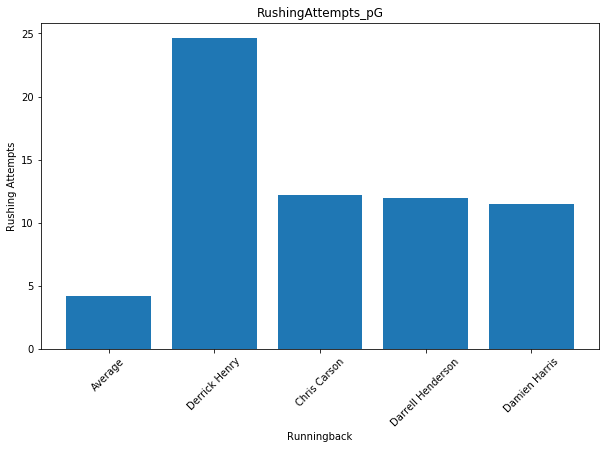

In [158]:
average, henry, derrick = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'RushingAttempts_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 17.72
Derrick Henry RushingYds_pG: 117.6
--------------------------------------------------
Avg RushingYds_pG: 17.72
Chris Carson RushingYds_pG: 57.8
--------------------------------------------------
Avg RushingYds_pG: 17.72
Darrell Henderson RushingYds_pG: 58.0
--------------------------------------------------
Avg RushingYds_pG: 17.72
Damien Harris RushingYds_pG: 59.5
--------------------------------------------------


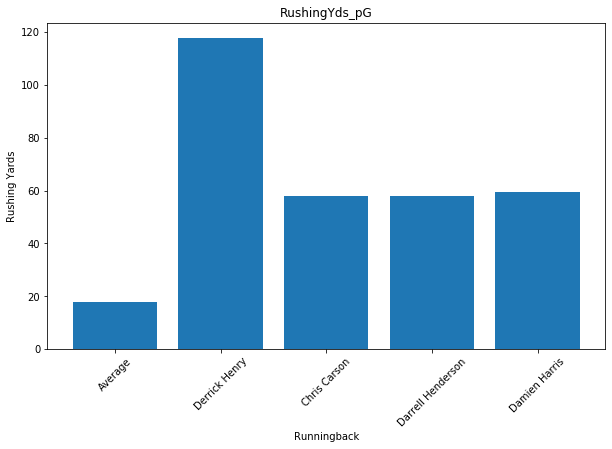

In [159]:
average, henry, derrick = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'RushingYds_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg Targeted_pG: 1.47
Derrick Henry Targeted_pG: 3.0
--------------------------------------------------
Avg Targeted_pG: 1.47
Chris Carson Targeted_pG: 4.6
--------------------------------------------------
Avg Targeted_pG: 1.47
Darrell Henderson Targeted_pG: 1.83
--------------------------------------------------
Avg Targeted_pG: 1.47
Damien Harris Targeted_pG: 0.5
--------------------------------------------------


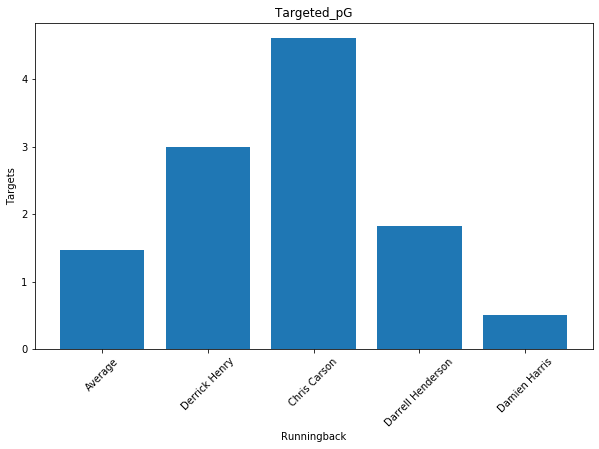

In [160]:
average, henry, derrick = print_metric(available_rbs, 'Targeted_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Targeted_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Targeted_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'Targeted_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.14
Derrick Henry Receptions_pG: 1.6
--------------------------------------------------
Avg Receptions_pG: 1.14
Chris Carson Receptions_pG: 4.2
--------------------------------------------------
Avg Receptions_pG: 1.14
Darrell Henderson Receptions_pG: 1.17
--------------------------------------------------
Avg Receptions_pG: 1.14
Damien Harris Receptions_pG: 0.5
--------------------------------------------------


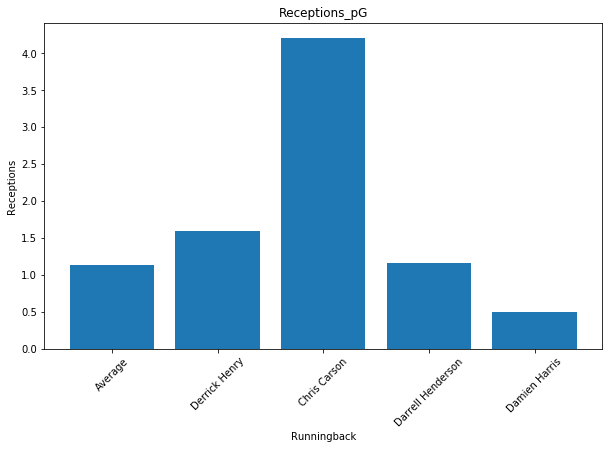

In [161]:
average, henry, derrick = print_metric(available_rbs, 'Receptions_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Receptions_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Receptions_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'Receptions_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

In [162]:
top_availRBs = available_rbs[(available_rbs['RushingAttempts_pG'] > available_rbs['RushingAttempts_pG'].mean()*1.5) & (available_rbs['RushingYds_pG'] > available_rbs['RushingYds_pG'].mean()*1.5)] 
top_availRBs = top_availRBs[~top_availRBs['Player'].isin(myteam_wrt)]
top_availRBs.sort_values('RushingYds_pG', ascending=False, inplace=True)
top_availRBs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
245,Phillip Lindsay,DEN,RB,26,2,2,0,0,0,0,0,30,125,5.70,0,1,1,11,11.00,0,0,0,0,0,0,14.10,69,,13.60,3.50,0.00,0.00,0.00,0.00,10.10,15.00,62.50,0.50,0.50,0.00,0.00,0.00
107,Austin Ekeler,LAC,RB,25,4,4,0,0,0,0,0,49,248,5.60,1,17,17,144,12.70,0,0,0,1,0,0,53.70,32,,45.20,8.70,14.80,20.30,1.40,0.00,0.00,12.25,62.00,4.25,4.25,0.25,0.00,0.00
179,Sony Michel,NWE,RB,25,3,3,0,0,0,0,0,26,173,12.50,1,3,2,23,16.00,0,0,0,1,0,0,26.60,49,,25.60,9.70,1.90,14.00,0.00,0.00,0.00,8.67,57.67,1.00,0.67,0.33,0.00,0.00
108,Adrian Peterson,DET,RB,35,5,3,0,0,0,0,0,69,285,5.30,2,7,5,49,17.00,0,0,0,2,0,0,47.90,31,,45.40,11.40,4.10,8.50,9.60,0.00,11.80,13.80,57.00,1.40,1.00,0.40,0.00,0.00
68,Myles Gaskin,MIA,RB,23,6,4,0,0,0,0,0,82,340,5.50,1,29,27,182,13.40,0,0,0,1,0,0,71.70,22,69,58.20,6.60,8.20,9.50,6.20,15.10,12.60,13.67,56.67,4.83,4.50,0.17,0.00,0.00
118,Latavius Murray,NOR,RB,30,5,2,0,0,0,0,0,52,218,5.90,2,8,6,68,14.30,0,0,0,2,0,0,43.60,35,,40.60,4.80,3.30,6.50,20.30,5.70,0.00,10.40,43.60,1.60,1.20,0.40,0.00,0.00
160,Frank Gore,NYJ,RB,37,6,5,0,0,0,0,0,75,250,6.30,0,9,6,35,13.30,0,0,0,0,0,0,31.50,42,,28.50,2.40,6.30,6.20,3.60,3.00,7.00,12.50,41.67,1.50,1.00,0.00,0.00,0.00
164,Devonta Freeman,NYG,RB,28,4,3,0,0,0,0,0,51,164,5.20,1,9,7,58,10.90,0,0,0,1,0,0,31.70,43,,28.20,0.00,0.00,1.00,6.80,14.70,5.70,12.75,41.00,2.25,1.75,0.25,0.00,0.00
128,Alexander Mattison,MIN,RB,22,6,1,0,0,0,0,0,54,245,9.40,1,11,9,61,13.80,0,0,0,1,0,0,41.10,38,,36.60,8.00,1.60,2.70,7.70,13.60,3.00,9.00,40.83,1.83,1.50,0.17,0.00,0.00
146,Joshua Kelley,LAC,RB,23,5,0,0,0,0,0,0,63,203,5.20,1,8,8,93,17.30,0,2,2,1,0,0,35.60,41,,31.60,12.00,11.30,3.20,1.30,3.80,0.00,12.60,40.60,1.60,1.60,0.20,0.00,0.40


Looking at my RBs, I'm not really interested in trading for someone else. Harris was inconsistent last week, but his first week in he was great. I'm not ready to make any changes.

Henry is coming off his biggest week so he's in. Chris Carson is a great RB and gets targeted pretty regularly.

In [163]:
# rb_opp = ['Houston Texans', 'Denver Broncos', 'San Francisco 49ers']

In [164]:
# defense[defense['Team'].isin(rb_opp)]

In [165]:
# teamRB1 = 20
# teamRB2 = None
# teamRB3 = 13
# teamRB4 = 6

In [166]:
# print(runningbacks['Player'][rb1] + ' vs ' + defense['Team'][teamRB1] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb1)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb1)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)

In [167]:
# print(runningbacks['Player'][rb2] + ' vs ' + defense['Team'][teamRB2] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb2)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb2)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)

In [168]:
# print(runningbacks['Player'][rb3] + ' vs ' + defense['Team'][teamRB3] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb3)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb3)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)

In [169]:
# print(runningbacks['Player'][rb4] + ' vs ' + defense['Team'][teamRB4] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb4)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb4)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)


## Tight End

In [170]:
tight_ends = offense[offense['Position'] == 'TE']

In [171]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')

In [172]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
9,Travis Kelce,KAN,TE,31,6,6,0,0,0,0,0,0,0,0.00,0,53,37,470,19.00,5,1,1,5,0,0,93.50,1,10,75.00,11.00,15.00,8.70,7.00,16.80,16.50,8.83,6.17,78.33,0.83
36,Mark Andrews,BAL,TE,24,6,1,0,0,0,0,0,0,0,0.00,0,33,20,243,13.50,5,1,0,5,0,0,64.30,2,37,54.30,17.80,2.90,2.20,17.70,11.60,2.10,5.50,3.33,40.50,0.83
37,Jonnu Smith,TEN,TE,25,5,5,0,0,0,0,0,0,0,0.00,0,29,19,234,15.20,5,0,0,5,0,0,62.90,3,38,53.40,9.60,20.40,6.10,0.00,16.00,1.30,5.80,3.80,46.80,1.00
39,George Kittle,SFO,TE,27,4,4,0,0,0,0,0,2,17,13.00,0,38,30,380,18.70,2,0,0,2,0,0,66.70,4,40,51.70,5.30,0.00,0.00,25.10,4.40,16.90,9.50,7.50,95.00,0.50
46,Robert Tonyan,GNB,TE,26,5,4,0,0,0,0,0,0,0,0.00,0,18,16,198,15.80,5,0,0,5,0,0,57.80,5,47,49.80,0.00,8.50,11.00,27.80,0.00,2.50,3.60,3.20,39.60,1.00


In [173]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
37,Jonnu Smith,TEN,TE,25,5,5,0,0,0,0,0,0,0,0.00,0,29,19,234,15.20,5,0,0,5,0,0,62.90,3,38,53.40,9.60,20.40,6.10,0.00,16.00,1.30,5.80,3.80,46.80,1.00
53,Jimmy Graham,CHI,TE,34,6,6,0,0,0,0,0,0,0,0.00,0,36,22,203,11.30,4,1,0,4,0,0,55.30,6,54,44.30,8.50,1.80,18.00,3.30,9.30,3.40,6.00,3.67,33.83,0.67


In [174]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]
available_te.sort_values('YdspReception', ascending = False, inplace = True)
available_te.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
355,Albert Okwuegbunam,DEN,TE,22,1,0,0,0,0,0,0,0,0,0.00,0,6,2,45,27.00,0,0,0,0,0,0,5.50,68,,4.50,0.00,0.00,0.00,0.00,0.00,4.50,6.00,2.00,45.00,0.00
149,Mo Alie-Cox,IND,TE,27,5,2,0,0,0,0,0,0,0,0.00,0,14,11,194,23.40,2,0,0,2,0,0,36.90,16,,31.40,2.00,11.10,11.00,7.30,0.00,0.00,2.80,2.20,38.80,0.40
249,Jack Doyle,IND,TE,30,5,5,0,0,0,0,0,0,0,0.00,0,10,7,90,20.60,1,1,1,1,0,0,16.50,40,,13.00,4.90,0.00,0.00,1.20,0.00,6.90,2.00,1.40,18.00,0.20
74,Darren Fells,HOU,TE,34,6,6,0,0,0,0,0,0,0,0.00,0,19,14,205,20.40,3,0,0,3,0,0,45.50,12,75,38.50,1.90,8.30,0.00,2.10,11.70,14.50,3.17,2.33,34.17,0.50
165,Rob Gronkowski,TAM,TE,31,6,6,0,0,0,0,0,0,0,0.00,0,28,17,218,20.20,1,0,0,1,0,0,36.30,18,,27.80,1.10,0.00,4.80,2.90,5.20,13.80,4.67,2.83,36.33,0.17


In [175]:
te1 = 37
te2 = 131
te3 = 53
te4 = 165

Avg Targeted_pG: 2.17
Jonnu Smith Targeted_pG: 5.8
--------------------------------------------------
Avg Targeted_pG: 2.17
Dalton Schultz Targeted_pG: 6.0
--------------------------------------------------
Avg Targeted_pG: 2.17
Jimmy Graham Targeted_pG: 6.0
--------------------------------------------------
Avg Targeted_pG: 2.17
Rob Gronkowski Targeted_pG: 4.67
--------------------------------------------------


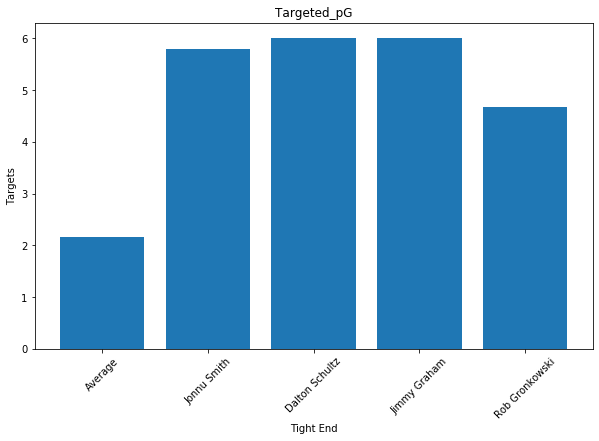

In [176]:
average, smith, jonnu = print_metric(available_te, 'Targeted_pG', te1)
average, schultz, dalton = print_metric(available_te, 'Targeted_pG', te2)
average, graham, jimmy = print_metric(available_te, 'Targeted_pG', te3)
average, gronkowski, rob = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', smith, schultz, graham, gronkowski]
y = [average, jonnu, dalton, jimmy, rob]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.47
Jonnu Smith Receptions_pG: 3.8
--------------------------------------------------
Avg Receptions_pG: 1.47
Dalton Schultz Receptions_pG: 3.83
--------------------------------------------------
Avg Receptions_pG: 1.47
Jimmy Graham Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.47
Rob Gronkowski Receptions_pG: 2.83
--------------------------------------------------


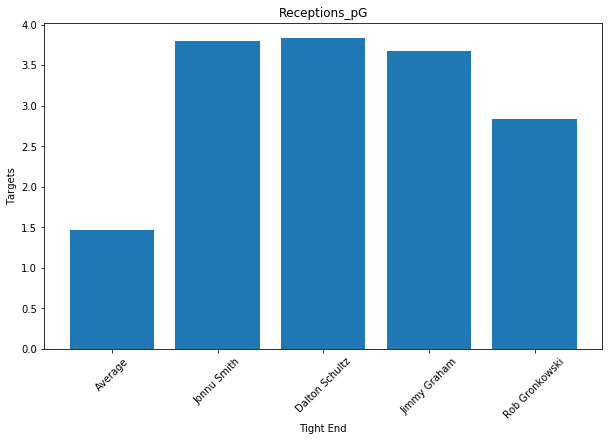

In [177]:
average, smith, jonnu = print_metric(available_te, 'Receptions_pG', te1)
average, schultz, dalton = print_metric(available_te, 'Receptions_pG', te2)
average, graham, jimmy = print_metric(available_te, 'Receptions_pG', te3)
average, gronkowski, rob = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', smith, schultz, graham, gronkowski]
y = [average, jonnu, dalton, jimmy, rob]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Targets')

Avg ReceivingYds_pG: 15.48
Jonnu Smith ReceivingYds_pG: 46.8
--------------------------------------------------
Avg ReceivingYds_pG: 15.48
Dalton Schultz ReceivingYds_pG: 43.33
--------------------------------------------------
Avg ReceivingYds_pG: 15.48
Jimmy Graham ReceivingYds_pG: 33.83
--------------------------------------------------
Avg ReceivingYds_pG: 15.48
Rob Gronkowski ReceivingYds_pG: 36.33
--------------------------------------------------


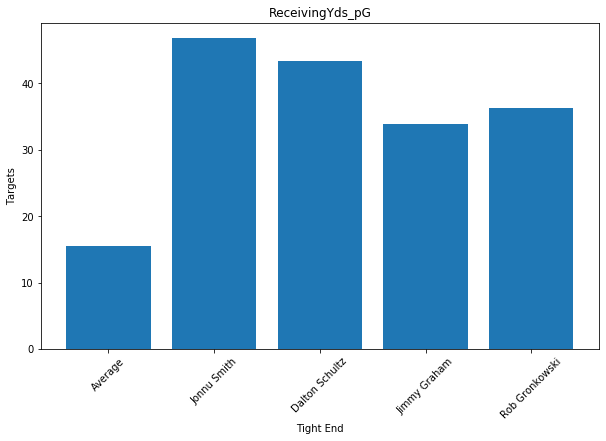

In [178]:
average, smith, jonnu = print_metric(available_te, 'ReceivingYds_pG', te1)
average, schultz, dalton = print_metric(available_te, 'ReceivingYds_pG', te2)
average, graham, jimmy = print_metric(available_te, 'ReceivingYds_pG', te3)
average, gronkowski, rob = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', smith, schultz, graham, gronkowski]
y = [average, jonnu, dalton, jimmy, rob]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Targets')

In [179]:
te_opp = {'Tennessee Titans': 'Pittsburgh Steelers',
          'Dallas Cowboys': 'Washington Football Team',
          'Chicago Bears': 'Los Angeles Rams', 
          'Tampa Bay Buccaneers': 'Las Vegas Raiders'}

In [180]:
defense[defense['Team'].isin(te_opp.values())]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
0,Pittsburgh Steelers,5,94,294,4.90,1426,99,331,3.30,3,171,5.60,100,12.60,1095,9,13,8,61.50,9,8,1,24,54.00,8.00,13.00,7.00,10.00,8.00,18.00,18.80,285.20,19.80,66.20,34.20,20.00,0.58,219.00,4.80,10.80
6,Los Angeles Rams,6,114,384,5.00,1911,150,654,4.40,5,214,5.40,139,10.00,1257,8,19,12,63.20,6,4,2,20,38.00,4.00,7.00,4.00,11.00,12.00,0.00,19.00,318.50,25.00,109.00,35.67,23.17,0.65,209.50,3.33,6.33
19,Las Vegas Raiders,5,152,315,6.20,1968,131,634,4.80,10,177,7.30,111,12.40,1334,7,22,15,68.20,3,3,0,7,9.00,0.00,2.00,3.00,0.00,4.00,0.00,30.40,393.60,26.20,126.80,35.40,22.20,0.63,266.80,1.40,1.80
22,Washington Football Team,6,162,370,5.50,2022,179,780,4.40,8,175,6.50,114,11.80,1242,10,20,11,55.00,8,7,1,16,30.00,15.00,4.00,1.00,4.00,2.00,4.00,27.00,337.00,29.83,130.00,29.17,19.00,0.65,207.00,2.67,5.00


In [181]:
teamTE1 = 0
teamTE2 = 22
teamTE3 = 6
teamTE4 = 19

In [182]:
print(tight_ends['Player'][te1] + ' vs ' + defense['Team'][teamTE1] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te1)
print_metric_team(defense, 'Passing_Att_pG', teamTE1)
print('')
print_metric(tight_ends, 'Receptions_pG', te1)
print_metric_team(defense, 'Completions_pG', teamTE1)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te1)
print_metric_team(defense, 'Passing_Yds_pG', teamTE1)

Jonnu Smith vs Pittsburgh Steelers Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Jonnu Smith Targeted_pG: 5.8
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Pittsburgh Steelers Passing_Att_pG: 34.2
--------------------------------------------------

Avg Receptions_pG: 1.86
Jonnu Smith Receptions_pG: 3.8
--------------------------------------------------
Avg Completions_pG: 23.14
Pittsburgh Steelers Completions_pG: 20.0
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Jonnu Smith ReceivingYds_pG: 46.8
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Pittsburgh Steelers Passing_Yds_pG: 219.0
--------------------------------------------------


(244.62, 'Pittsburgh Steelers', 219.0)

In [183]:
print(tight_ends['Player'][te2] + ' vs ' + defense['Team'][teamTE2] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te2)
print_metric_team(defense, 'Passing_Att_pG', teamTE2)
print('')
print_metric(tight_ends, 'Receptions_pG', te2)
print_metric_team(defense, 'Completions_pG', teamTE2)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te2)
print_metric_team(defense, 'Passing_Yds_pG', teamTE2)

Dalton Schultz vs Washington Football Team Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Dalton Schultz Targeted_pG: 6.0
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Washington Football Team Passing_Att_pG: 29.17
--------------------------------------------------

Avg Receptions_pG: 1.86
Dalton Schultz Receptions_pG: 3.83
--------------------------------------------------
Avg Completions_pG: 23.14
Washington Football Team Completions_pG: 19.0
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Dalton Schultz ReceivingYds_pG: 43.33
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Washington Football Team Passing_Yds_pG: 207.0
--------------------------------------------------


(244.62, 'Washington Football Team', 207.0)

In [184]:
print(tight_ends['Player'][te3] + ' vs ' + defense['Team'][teamTE3] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te3)
print_metric_team(defense, 'Passing_Att_pG', teamTE3)
print('')
print_metric(tight_ends, 'Receptions_pG', te3)
print_metric_team(defense, 'Completions_pG', teamTE3)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te3)
print_metric_team(defense, 'Passing_Yds_pG', teamTE3)

Jimmy Graham vs Los Angeles Rams Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Jimmy Graham Targeted_pG: 6.0
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Los Angeles Rams Passing_Att_pG: 35.67
--------------------------------------------------

Avg Receptions_pG: 1.86
Jimmy Graham Receptions_pG: 3.67
--------------------------------------------------
Avg Completions_pG: 23.14
Los Angeles Rams Completions_pG: 23.17
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Jimmy Graham ReceivingYds_pG: 33.83
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Los Angeles Rams Passing_Yds_pG: 209.5
--------------------------------------------------


(244.62, 'Los Angeles Rams', 209.5)

In [185]:
print(tight_ends['Player'][te4] + ' vs ' + defense['Team'][teamTE4] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te4)
print_metric_team(defense, 'Passing_Att_pG', teamTE4)
print('')
print_metric(tight_ends, 'Receptions_pG', te4)
print_metric_team(defense, 'Completions_pG', teamTE4)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te4)
print_metric_team(defense, 'Passing_Yds_pG', teamTE4)

Rob Gronkowski vs Las Vegas Raiders Summary:
--------------------------------------------------

Avg Targeted_pG: 2.76
Rob Gronkowski Targeted_pG: 4.67
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Las Vegas Raiders Passing_Att_pG: 35.4
--------------------------------------------------

Avg Receptions_pG: 1.86
Rob Gronkowski Receptions_pG: 2.83
--------------------------------------------------
Avg Completions_pG: 23.14
Las Vegas Raiders Completions_pG: 22.2
--------------------------------------------------

Avg ReceivingYds_pG: 20.23
Rob Gronkowski ReceivingYds_pG: 36.33
--------------------------------------------------
Avg Passing_Yds_pG: 244.62
Las Vegas Raiders Passing_Yds_pG: 266.8
--------------------------------------------------


(244.62, 'Las Vegas Raiders', 266.8)



## Wide Receiver

In [154]:
wrs = offense[offense['Position'] == 'WR']

In [155]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [156]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
16,DeAndre Hopkins,ARI,WR,28,7,7,0,0,0,0,0,0,0,0.00,0,73,57,704,15.50,3,1,1,3,0,0,114.90,4,17,86.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,10.43,8.14,0.78,100.57,0.43,0.14
33,Robby Anderson,CAR,WR,27,7,7,0,0,0,0,0,1,3,3.00,0,59,46,640,22.10,1,1,1,1,1,0,93.30,13,34,70.40,19.50,8.90,5.50,9.90,11.50,7.70,7.40,8.43,6.57,0.78,91.43,0.14,0.14
44,Tyler Boyd,CIN,WR,26,7,5,1,1,16,0,0,2,29,19.00,0,61,48,517,17.70,2,1,0,2,0,0,91.20,17,45,67.20,3.30,13.20,12.50,9.40,4.20,7.90,16.70,8.71,6.86,0.79,73.86,0.29,0.00
69,Julio Jones,ATL,WR,31,5,5,0,0,0,0,0,0,0,0.00,0,39,31,447,18.20,2,0,0,2,0,0,72.20,28,70,56.70,15.70,2.40,0.00,3.20,0.00,25.70,9.70,7.80,6.20,0.79,89.40,0.40,0.00
109,Jamison Crowder,NYJ,WR,27,4,4,0,0,0,0,0,0,0,0.00,0,46,29,383,15.10,2,0,0,2,0,0,64.80,35,,50.30,17.50,0.00,0.00,10.40,17.60,4.80,0.00,11.50,7.25,0.63,95.75,0.50,0.00
137,Diontae Johnson,PIT,WR,24,5,5,0,0,0,0,0,1,9,9.00,0,41,24,227,13.60,3,1,1,3,0,0,51.60,54,,39.60,3.70,15.20,0.90,0.00,0.20,0.00,20.00,8.20,4.80,0.59,45.40,0.60,0.20


In [157]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
16,DeAndre Hopkins,ARI,WR,28,7,7,0,0,0,0,0,0,0,0.00,0,73,57,704,15.50,3,1,1,3,0,0,114.90,4,17,86.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,10.43,8.14,0.78,100.57,0.43,0.14
27,Justin Jefferson,MIN,WR,21,6,4,0,0,0,0,0,0,0,0.00,0,36,28,537,20.80,3,0,0,3,1,0,87.70,10,28,73.70,2.60,4.40,23.50,10.30,2.30,30.60,0.00,6.00,4.67,0.78,89.50,0.50,0.00
33,Robby Anderson,CAR,WR,27,7,7,0,0,0,0,0,1,3,3.00,0,59,46,640,22.10,1,1,1,1,1,0,93.30,13,34,70.40,19.50,8.90,5.50,9.90,11.50,7.70,7.40,8.43,6.57,0.78,91.43,0.14,0.14
44,Tyler Boyd,CIN,WR,26,7,5,1,1,16,0,0,2,29,19.00,0,61,48,517,17.70,2,1,0,2,0,0,91.20,17,45,67.20,3.30,13.20,12.50,9.40,4.20,7.90,16.70,8.71,6.86,0.79,73.86,0.29,0.00
57,Tee Higgins,CIN,WR,21,7,5,0,0,0,0,0,3,22,10.30,0,43,27,410,16.90,3,0,0,3,0,0,74.70,22,58,61.20,0.00,3.50,16.00,9.00,6.20,12.70,13.80,6.14,3.86,0.63,58.57,0.43,0.00


In [161]:
available_wrs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'Week_7', 'Targeted_pG', 'Receptions_pG', 'Catch_Rate',
       'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG'],
      dtype='object')

In [162]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

for column in columns:
    scaled_wrs[column] = scaler.fit_transform(scaled_wrs[[column]])

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
16,DeAndre Hopkins,ARI,WR,7,7,2.97,3.58,0.61,3.21,1.55,1.24
27,Justin Jefferson,MIN,WR,6,4,1.13,1.50,0.59,2.72,1.93,-0.21
33,Robby Anderson,CAR,WR,7,7,2.14,2.64,0.60,2.81,0.02,1.24
44,Tyler Boyd,CIN,WR,7,5,2.26,2.81,0.64,2.04,0.79,-0.21
57,Tee Higgins,CIN,WR,7,5,1.19,1.02,-0.26,1.37,1.55,-0.21


In [163]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
109,Jamison Crowder,NYJ,WR,4,4,3.42,3.05,-0.25,3.00,1.93,-0.21,11.36
16,DeAndre Hopkins,ARI,WR,7,7,2.97,3.58,0.61,3.21,1.55,1.24,10.68
102,Travis Fulgham,PHI,WR,4,4,2.48,2.15,-0.30,2.71,3.27,-0.21,10.53
69,Julio Jones,ATL,WR,5,5,1.88,2.42,0.69,2.72,1.40,-0.21,9.31
44,Tyler Boyd,CIN,WR,7,5,2.26,2.81,0.64,2.04,0.79,-0.21,8.75
139,Allen Lazard,GNB,WR,3,3,0.99,1.30,0.52,2.51,2.82,-0.21,8.36
27,Justin Jefferson,MIN,WR,6,4,1.13,1.50,0.59,2.72,1.93,-0.21,8.09
150,Corey Davis,TEN,WR,4,4,1.65,1.85,0.29,1.44,1.93,-0.21,7.37
59,Cole Beasley,BUF,WR,7,4,1.55,2.04,0.69,1.74,0.79,-0.21,7.02
33,Robby Anderson,CAR,WR,7,7,2.14,2.64,0.60,2.81,0.02,1.24,6.97


In [164]:
wr1 = 16
wr2 = 33
wr3 = 44
wr4 = 69
wr5 = 109
wr6 = 137
wr7 = 102
wr8 = 27

Avg Targeted_pG: 3.28
DeAndre Hopkins Targeted_pG: 10.43
--------------------------------------------------
Avg Targeted_pG: 3.28
Robby Anderson Targeted_pG: 8.43
--------------------------------------------------
Avg Targeted_pG: 3.28
Tyler Boyd Targeted_pG: 8.71
--------------------------------------------------
Avg Targeted_pG: 3.28
Julio Jones Targeted_pG: 7.8
--------------------------------------------------
Avg Targeted_pG: 3.28
Jamison Crowder Targeted_pG: 11.5
--------------------------------------------------
Avg Targeted_pG: 3.28
Diontae Johnson Targeted_pG: 8.2
--------------------------------------------------
Avg Targeted_pG: 3.28
Travis Fulgham Targeted_pG: 9.25
--------------------------------------------------
Avg Targeted_pG: 3.28
Justin Jefferson Targeted_pG: 6.0
--------------------------------------------------


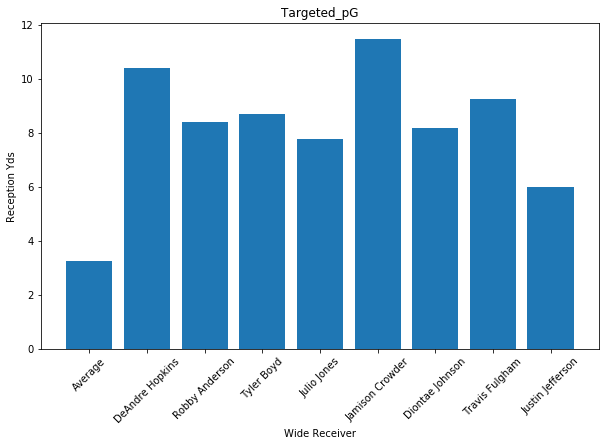

In [166]:
average, hopkins, deandre = print_metric(available_wrs, 'Targeted_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'Targeted_pG', wr2)
average, boyd, tyler = print_metric(available_wrs, 'Targeted_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'Targeted_pG', wr4)
average, crowder, jamison = print_metric(available_wrs, 'Targeted_pG', wr5)
average, johnson, diontae = print_metric(available_wrs, 'Targeted_pG', wr6)
average, fulgham, travis = print_metric(available_wrs, 'Targeted_pG', wr7)
average, jefferson, justin = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', hopkins, anderson, boyd, jones, crowder, johnson, fulgham, jefferson]
y = [average, deandre, robby, tyler, julio, jamison, diontae, travis, justin]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

Avg Receptions_pG: 2.16
DeAndre Hopkins Receptions_pG: 8.14
--------------------------------------------------
Avg Receptions_pG: 2.16
Robby Anderson Receptions_pG: 6.57
--------------------------------------------------
Avg Receptions_pG: 2.16
Tyler Boyd Receptions_pG: 6.86
--------------------------------------------------
Avg Receptions_pG: 2.16
Julio Jones Receptions_pG: 6.2
--------------------------------------------------
Avg Receptions_pG: 2.16
Jamison Crowder Receptions_pG: 7.25
--------------------------------------------------
Avg Receptions_pG: 2.16
Diontae Johnson Receptions_pG: 4.8
--------------------------------------------------
Avg Receptions_pG: 2.16
Travis Fulgham Receptions_pG: 5.75
--------------------------------------------------
Avg Receptions_pG: 2.16
Justin Jefferson Receptions_pG: 4.67
--------------------------------------------------


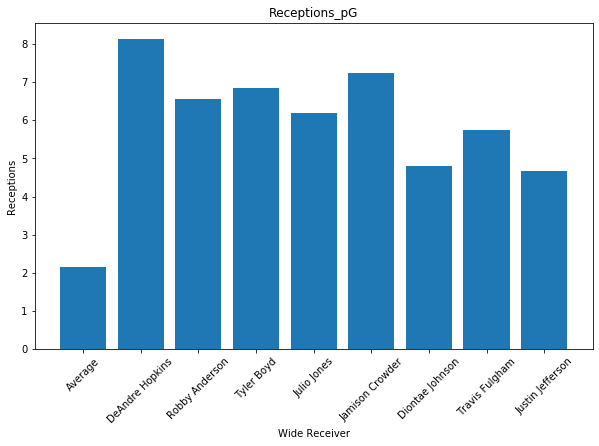

In [168]:
average, hopkins, deandre = print_metric(available_wrs, 'Receptions_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'Receptions_pG', wr2)
average, boyd, tyler = print_metric(available_wrs, 'Receptions_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'Receptions_pG', wr4)
average, crowder, jamison = print_metric(available_wrs, 'Receptions_pG', wr5)
average, johnson, diontae = print_metric(available_wrs, 'Receptions_pG', wr6)
average, fulgham, travis = print_metric(available_wrs, 'Receptions_pG', wr7)
average, jefferson, justin = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', hopkins, anderson, boyd, jones, crowder, johnson, fulgham, jefferson]
y = [average, deandre, robby, tyler, julio, jamison, diontae, travis, justin]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

Avg Catch_Rate: 0.67
DeAndre Hopkins Catch_Rate: 0.78
--------------------------------------------------
Avg Catch_Rate: 0.67
Robby Anderson Catch_Rate: 0.78
--------------------------------------------------
Avg Catch_Rate: 0.67
Tyler Boyd Catch_Rate: 0.79
--------------------------------------------------
Avg Catch_Rate: 0.67
Julio Jones Catch_Rate: 0.79
--------------------------------------------------
Avg Catch_Rate: 0.67
Jamison Crowder Catch_Rate: 0.63
--------------------------------------------------
Avg Catch_Rate: 0.67
Diontae Johnson Catch_Rate: 0.59
--------------------------------------------------
Avg Catch_Rate: 0.67
Travis Fulgham Catch_Rate: 0.62
--------------------------------------------------
Avg Catch_Rate: 0.67
Justin Jefferson Catch_Rate: 0.78
--------------------------------------------------


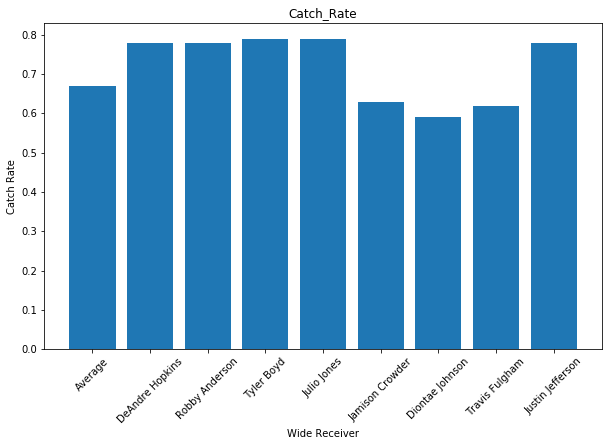

In [169]:
average, hopkins, deandre = print_metric(available_wrs, 'Catch_Rate', wr1)
average, anderson, robby = print_metric(available_wrs, 'Catch_Rate', wr2)
average, boyd, tyler = print_metric(available_wrs, 'Catch_Rate', wr3)
average, jones, julio = print_metric(available_wrs, 'Catch_Rate', wr4)
average, crowder, jamison = print_metric(available_wrs, 'Catch_Rate', wr5)
average, johnson, diontae = print_metric(available_wrs, 'Catch_Rate', wr6)
average, fulgham, travis = print_metric(available_wrs, 'Catch_Rate', wr7)
average, jefferson, justin = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', hopkins, anderson, boyd, jones, crowder, johnson, fulgham, jefferson]
y = [average, deandre, robby, tyler, julio, jamison, diontae, travis, justin]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Catch Rate')

Avg ReceivingYds_pG: 27.36
DeAndre Hopkins ReceivingYds_pG: 100.57
--------------------------------------------------
Avg ReceivingYds_pG: 27.36
Robby Anderson ReceivingYds_pG: 91.43
--------------------------------------------------
Avg ReceivingYds_pG: 27.36
Tyler Boyd ReceivingYds_pG: 73.86
--------------------------------------------------
Avg ReceivingYds_pG: 27.36
Julio Jones ReceivingYds_pG: 89.4
--------------------------------------------------
Avg ReceivingYds_pG: 27.36
Jamison Crowder ReceivingYds_pG: 95.75
--------------------------------------------------
Avg ReceivingYds_pG: 27.36
Diontae Johnson ReceivingYds_pG: 45.4
--------------------------------------------------
Avg ReceivingYds_pG: 27.36
Travis Fulgham ReceivingYds_pG: 89.25
--------------------------------------------------
Avg ReceivingYds_pG: 27.36
Justin Jefferson ReceivingYds_pG: 89.5
--------------------------------------------------


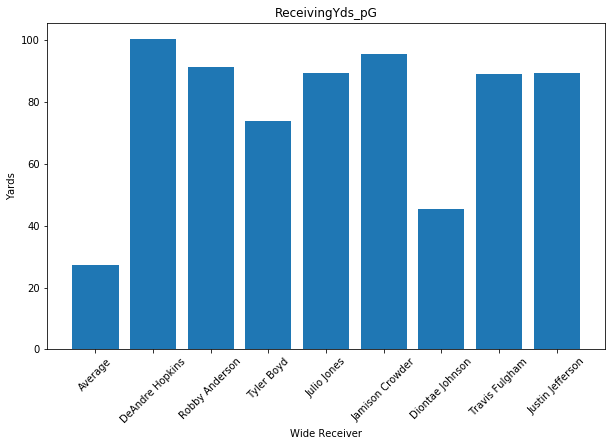

In [171]:
average, hopkins, deandre = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, boyd, tyler = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, crowder, jamison = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, johnson, diontae = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, fulgham, travis = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, jefferson, justin = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', hopkins, anderson, boyd, jones, crowder, johnson, fulgham, jefferson]
y = [average, deandre, robby, tyler, julio, jamison, diontae, travis, justin]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

In [172]:
wr_opp = {'Arizona Cardinals': None, 
          'Carolina Panthers': 'Atlanta Falcons', 
          'Cincannati Bengals': 'Tennessee Titans', 
          'Atlanta Falcons': 'Carolina Panthers', 
          'New York Jets': 'Kansas City Chiefs', 
          'Pittsburgh Steelers': 'Baltimore Ravens', 
          'Philadelphia Eagles': 'Dallas Cowboys', 
          'Minnesota Vikings': 'Green Bay Packers'}

In [173]:
defense[defense['Team'].isin(list(wr_opp.values()))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
0,Baltimore Ravens,6,104,397,5.10,2039,143,654,4.60,4,232,5.50,149,10.50,1385,8,13,10,76.90,11,3,8,22,70.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,17.33,339.83,23.83,109.00,38.67,24.83,0.64,230.83,1.33,3.67,11.67
9,Kansas City Chiefs,7,143,457,5.50,2531,213,1049,4.90,7,228,6.10,137,11.50,1482,9,20,14,70.00,13,9,4,16,59.00,7.00,5.00,7.00,20.00,-1.00,3.00,18.00,20.43,361.57,30.43,149.86,32.57,19.57,0.60,211.71,1.29,2.29,8.43
11,Tennessee Titans,6,153,405,6.00,2411,160,779,4.90,5,238,6.70,157,10.80,1632,15,21,17,81.00,12,9,3,7,27.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,25.50,401.83,26.67,129.83,39.67,26.17,0.66,272.00,2.50,1.17,4.50
14,Green Bay Packers,6,159,360,5.80,2102,145,660,4.60,7,200,6.70,142,10.90,1442,11,21,15,71.40,4,2,2,15,30.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,26.50,350.33,24.17,110.00,33.33,23.67,0.71,240.33,1.83,2.50,5.00
17,Carolina Panthers,7,168,441,5.60,2458,177,868,4.90,10,258,6.00,178,9.20,1590,9,23,15,65.20,10,4,6,6,26.00,-1.00,3.00,11.00,3.00,5.00,2.00,3.00,24.00,351.14,25.29,124.00,36.86,25.43,0.69,227.14,1.29,0.86,3.71
26,Atlanta Falcons,7,207,449,6.60,2981,163,647,4.00,6,276,8.20,197,12.20,2334,19,26,19,73.10,8,5,3,10,16.00,-1.00,3.00,5.00,0.00,0.00,7.00,2.00,29.57,425.86,23.29,92.43,39.43,28.14,0.71,333.43,2.71,1.43,2.29
30,Dallas Cowboys,7,243,475,6.00,2857,241,1248,5.20,11,221,6.90,135,12.40,1609,16,28,18,64.30,3,1,2,13,7.00,4.00,-3.00,0.00,-2.00,9.00,-3.00,2.00,34.71,408.14,34.43,178.29,31.57,19.29,0.61,229.86,2.29,1.86,1.00


In [174]:
teamWR1 = None
teamWR2 = 26
teamWR3 = 11
teamWR4 = 17
teamWR5 = 9
teamWR6 = 0
teamWR7 = 30
teamWR8 = 14

Avg Ttl_Pts_Allowed_pG: 25.63
Atlanta Falcons Ttl_Pts_Allowed_pG: 29.57
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.63
Tennessee Titans Ttl_Pts_Allowed_pG: 25.5
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.63
Carolina Panthers Ttl_Pts_Allowed_pG: 24.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.63
Kansas City Chiefs Ttl_Pts_Allowed_pG: 20.43
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.63
Baltimore Ravens Ttl_Pts_Allowed_pG: 17.33
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.63
Dallas Cowboys Ttl_Pts_Allowed_pG: 34.71
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.63
Green Bay Packers Ttl_Pts_Allowed_pG: 26.5
--------------------------------------------------


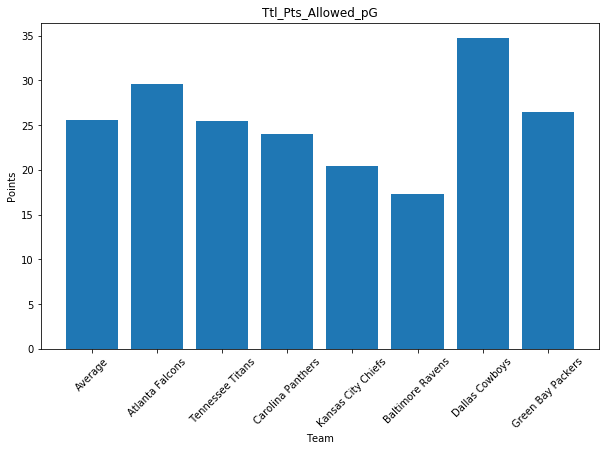

In [183]:
average, atlanta, falcons = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, tennessee, titans = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, carolina, panthers = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, kansascity, chiefs = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, baltimore, ravens = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, dallas, cowboys = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, greenbay, packers = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', atlanta, tennessee, carolina, kansascity, baltimore, dallas, greenbay]
y = [average, falcons, titans, panthers, chiefs, ravens, cowboys, packers]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Passing_TDs_pG: 1.76
Atlanta Falcons Passing_TDs_pG: 2.71
--------------------------------------------------
Avg Passing_TDs_pG: 1.76
Tennessee Titans Passing_TDs_pG: 2.5
--------------------------------------------------
Avg Passing_TDs_pG: 1.76
Carolina Panthers Passing_TDs_pG: 1.29
--------------------------------------------------
Avg Passing_TDs_pG: 1.76
Kansas City Chiefs Passing_TDs_pG: 1.29
--------------------------------------------------
Avg Passing_TDs_pG: 1.76
Baltimore Ravens Passing_TDs_pG: 1.33
--------------------------------------------------
Avg Passing_TDs_pG: 1.76
Dallas Cowboys Passing_TDs_pG: 2.29
--------------------------------------------------
Avg Passing_TDs_pG: 1.76
Green Bay Packers Passing_TDs_pG: 1.83
--------------------------------------------------


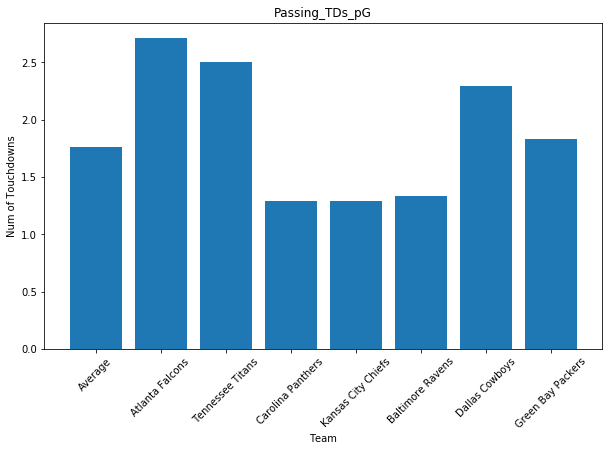

In [176]:
average, atlanta, falcons = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, tennessee, titans = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, carolina, panthers = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, kansascity, chiefs = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, baltimore, ravens = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, dallas, cowboys = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, greenbay, packers = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', atlanta, tennessee, carolina, kansascity, baltimore, dallas, greenbay]
y = [average, falcons, titans, panthers, chiefs, ravens, cowboys, packers]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Avg Passing_Att_pG: 35.38
Atlanta Falcons Passing_Att_pG: 39.43
--------------------------------------------------
Avg Passing_Att_pG: 35.38
Tennessee Titans Passing_Att_pG: 39.67
--------------------------------------------------
Avg Passing_Att_pG: 35.38
Carolina Panthers Passing_Att_pG: 36.86
--------------------------------------------------
Avg Passing_Att_pG: 35.38
Kansas City Chiefs Passing_Att_pG: 32.57
--------------------------------------------------
Avg Passing_Att_pG: 35.38
Baltimore Ravens Passing_Att_pG: 38.67
--------------------------------------------------
Avg Passing_Att_pG: 35.38
Dallas Cowboys Passing_Att_pG: 31.57
--------------------------------------------------
Avg Passing_Att_pG: 35.38
Green Bay Packers Passing_Att_pG: 33.33
--------------------------------------------------


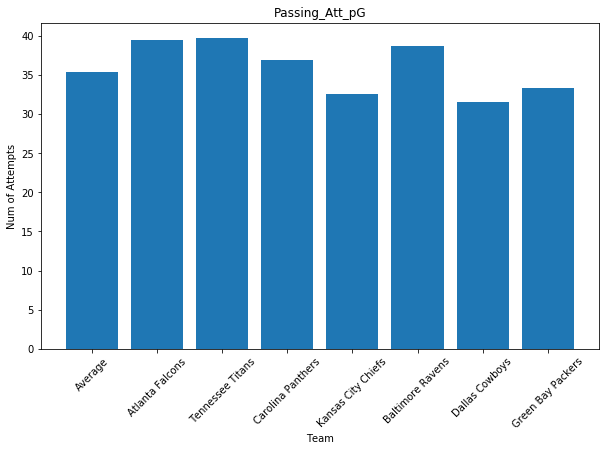

In [179]:
average, atlanta, falcons = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, tennessee, titans = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, carolina, panthers = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, kansascity, chiefs = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, baltimore, ravens = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, dallas, cowboys = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, greenbay, packers = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', atlanta, tennessee, carolina, kansascity, baltimore, dallas, greenbay]
y = [average, falcons, titans, panthers, chiefs, ravens, cowboys, packers]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Avg Completions_pG: 23.27
Atlanta Falcons Completions_pG: 28.14
--------------------------------------------------
Avg Completions_pG: 23.27
Tennessee Titans Completions_pG: 26.17
--------------------------------------------------
Avg Completions_pG: 23.27
Carolina Panthers Completions_pG: 25.43
--------------------------------------------------
Avg Completions_pG: 23.27
Kansas City Chiefs Completions_pG: 19.57
--------------------------------------------------
Avg Completions_pG: 23.27
Baltimore Ravens Completions_pG: 24.83
--------------------------------------------------
Avg Completions_pG: 23.27
Dallas Cowboys Completions_pG: 19.29
--------------------------------------------------
Avg Completions_pG: 23.27
Green Bay Packers Completions_pG: 23.67
--------------------------------------------------


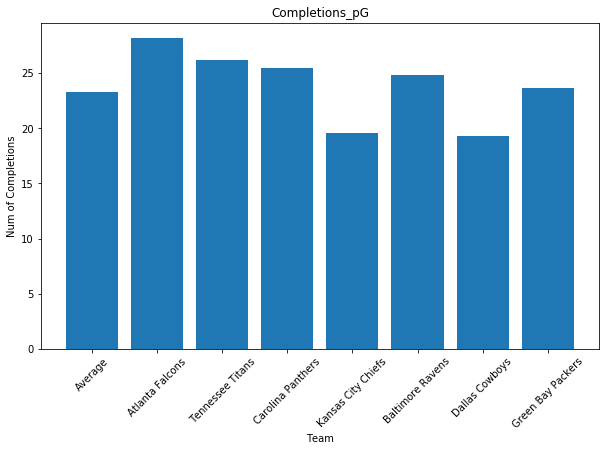

In [180]:
average, atlanta, falcons = print_metric_team(defense, 'Completions_pG', teamWR2)
average, tennessee, titans = print_metric_team(defense, 'Completions_pG', teamWR3)
average, carolina, panthers = print_metric_team(defense, 'Completions_pG', teamWR4)
average, kansascity, chiefs = print_metric_team(defense, 'Completions_pG', teamWR5)
average, baltimore, ravens = print_metric_team(defense, 'Completions_pG', teamWR6)
average, dallas, cowboys = print_metric_team(defense, 'Completions_pG', teamWR7)
average, greenbay, packers = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', atlanta, tennessee, carolina, kansascity, baltimore, dallas, greenbay]
y = [average, falcons, titans, panthers, chiefs, ravens, cowboys, packers]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Avg Completion_Percent_Allowed: 0.66
Atlanta Falcons Completion_Percent_Allowed: 0.71
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Tennessee Titans Completion_Percent_Allowed: 0.66
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Carolina Panthers Completion_Percent_Allowed: 0.69
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Kansas City Chiefs Completion_Percent_Allowed: 0.6
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Baltimore Ravens Completion_Percent_Allowed: 0.64
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Dallas Cowboys Completion_Percent_Allowed: 0.61
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Green Bay Packers Completion_Percent_Allowed: 0.71
--------------------------------------------------


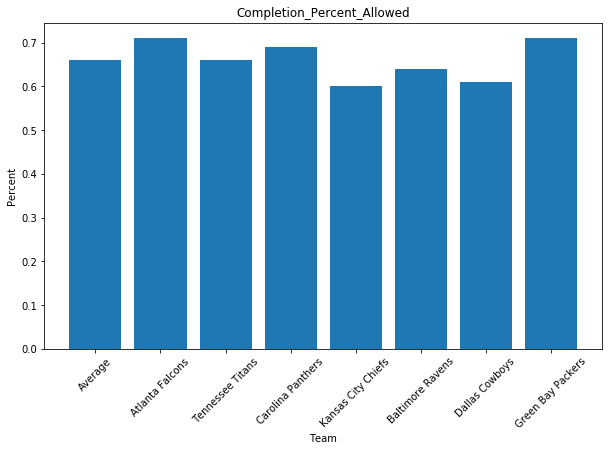

In [181]:
average, atlanta, falcons = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, tennessee, titans = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, carolina, panthers = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, kansascity, chiefs = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, baltimore, ravens = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, dallas, cowboys = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, greenbay, packers = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', atlanta, tennessee, carolina, kansascity, baltimore, dallas, greenbay]
y = [average, falcons, titans, panthers, chiefs, ravens, cowboys, packers]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Avg Passing_Yds_pG: 246.24
Atlanta Falcons Passing_Yds_pG: 333.43
--------------------------------------------------
Avg Passing_Yds_pG: 246.24
Tennessee Titans Passing_Yds_pG: 272.0
--------------------------------------------------
Avg Passing_Yds_pG: 246.24
Carolina Panthers Passing_Yds_pG: 227.14
--------------------------------------------------
Avg Passing_Yds_pG: 246.24
Kansas City Chiefs Passing_Yds_pG: 211.71
--------------------------------------------------
Avg Passing_Yds_pG: 246.24
Baltimore Ravens Passing_Yds_pG: 230.83
--------------------------------------------------
Avg Passing_Yds_pG: 246.24
Dallas Cowboys Passing_Yds_pG: 229.86
--------------------------------------------------
Avg Passing_Yds_pG: 246.24
Green Bay Packers Passing_Yds_pG: 240.33
--------------------------------------------------


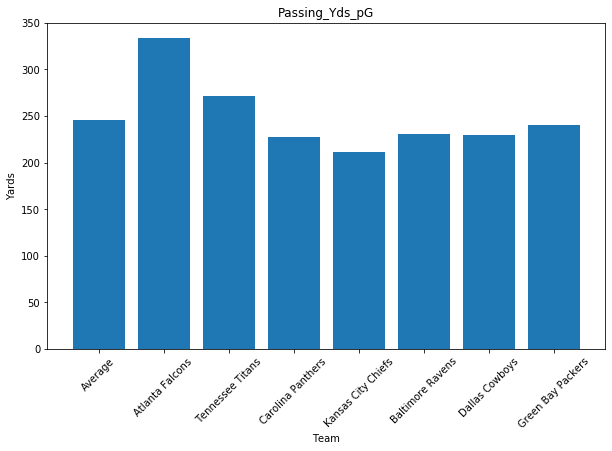

In [182]:
average, atlanta, falcons = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, tennessee, titans = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, carolina, panthers = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, kansascity, chiefs = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, baltimore, ravens = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, dallas, cowboys = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, greenbay, packers = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', atlanta, tennessee, carolina, kansascity, baltimore, dallas, greenbay]
y = [average, falcons, titans, panthers, chiefs, ravens, cowboys, packers]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

With Hopkins out for the Bye Week, it leaves my options to Anderson, Boyd, Jones, Crowder, Johnson, Fulgham and Jefferson. Anderson and Boyd are easy yes's. Both the Falcons and Titans have allowed more yards than the average defense. I'm also leaning yes on Jones since the Panthers allow 69% of passes. As of now, Jones is still questionable so my backup would be Diontae Johnson since the Ravens are thrown on 39 times per game. Johnson has also been battling injury after injury so I want a back up to my back up and I found that in Travis Fulgham. The Dallas defense has allowed the most points per game on average and 230 yards in the air.


## Defense

In [81]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [82]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
ARI,126,181,1299,8,6,148,705,8,170,126,1299,8,5,1,16,435.40
ATL,129,205,1472,7,3,128,571,6,200,129,1472,7,2,0,13,430.70
BAL,87,137,958,9,3,144,804,5,134,88,973,9,5,2,15,380.10
BUF,134,194,1611,14,3,122,469,4,188,134,1611,14,6,5,18,490.50
CAR,130,177,1460,6,3,136,588,6,171,130,1460,6,3,2,12,421.40


In [83]:
ttl_offense.reset_index(inplace=True)

In [84]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [85]:
ttl_offense.columns

Index(['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds',
       'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'ReceivingTDs',
       'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts', 'Long_Name'],
      dtype='object')

In [86]:
num_games = defense[['Team', 'GP']]
num_games.head()

,Team,GP
0,Baltimore Ravens,5
1,Pittsburgh Steelers,4
2,Indianapolis Colts,5
3,Tennessee Titans,4
4,Los Angeles Rams,5


In [88]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
0,ARI,Arizona Cardinals,5,126,181,1299,8,6,148,705,8,170,126,1299,8,5,1,16,435.40
1,ATL,Atlanta Falcons,5,129,205,1472,7,3,128,571,6,200,129,1472,7,2,0,13,430.70
2,BAL,Baltimore Ravens,5,87,137,958,9,3,144,804,5,134,88,973,9,5,2,15,380.10
3,BUF,Buffalo Bills,5,134,194,1611,14,3,122,469,4,188,134,1611,14,6,5,18,490.50
4,CAR,Carolina Panthers,5,130,177,1460,6,3,136,588,6,171,130,1460,6,3,2,12,421.40


In [89]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [110]:
taken_def = ['Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams',
             'Miami Dolphins', 'New England Patriots', 'Pittsburgh Steelers', 'San Francisco 49ers']

In [114]:
taken_off = ['Philadelphia Eagles', 'Kansas City Chiefs', 'Cincinnati Bengals', 'Buffalo Bills', 
             'San Francisco 49ers', 'New York Jets', 'Denver Broncos', 'Cleveland Browns', 'Los Angeles Rams']

In [111]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [144]:
available_def.sort_values('Week_5', ascending = False, inplace = True)
available_def

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
25,Cleveland Browns,5,149,339,5.70,1917,112,435,3.90,5,215,6.50,141,11.10,1482,12,20,13,65.00,12,6,6,12,36.00,0.00,4.00,14.00,5.00,13.00,29.80,383.40,22.40,87.00,43.00,28.20,0.66,296.40,2.40,7.20
18,New York Giants,5,133,322,5.30,1715,149,553,3.70,6,161,6.70,113,11.10,1162,8,19,12,63.20,6,3,3,12,27.00,4.00,9.00,-2.00,5.00,11.00,26.60,343.00,29.80,110.60,32.20,22.60,0.70,232.40,2.40,5.40
31,Dallas Cowboys,5,180,349,5.80,2022,167,779,4.70,7,172,6.80,111,11.60,1243,12,20,13,65.00,3,1,2,10,8.00,4.00,-3.00,0.00,-2.00,9.00,36.00,404.40,33.40,155.80,34.40,22.20,0.65,248.60,2.00,1.60
20,Houston Texans,5,140,346,5.60,1937,169,802,4.70,6,163,6.40,112,10.80,1135,9,22,12,54.50,2,0,2,14,16.00,0.00,4.00,1.00,2.00,9.00,28.00,387.40,33.80,160.40,32.60,22.40,0.69,227.00,2.80,3.20
3,Tennessee Titans,4,90,264,6.20,1637,108,593,5.50,3,151,6.70,97,11.20,1044,9,12,10,83.30,9,6,3,5,23.00,3.00,5.00,7.00,10.00,8.00,22.50,409.25,27.00,148.25,37.75,24.25,0.64,261.00,1.25,5.75
19,Seattle Seahawks,5,135,378,6.20,2356,130,504,3.90,6,239,7.50,160,11.80,1852,8,17,11,64.70,10,7,3,9,30.00,6.00,3.00,9.00,5.00,7.00,27.00,471.20,26.00,100.80,47.80,32.00,0.67,370.40,1.80,6.00
9,Arizona Cardinals,5,102,319,5.40,1733,138,621,4.50,3,167,6.10,104,11.80,1112,8,21,9,42.90,3,1,2,14,25.00,4.00,9.00,4.00,1.00,7.00,20.40,346.60,27.60,124.20,33.40,20.80,0.62,222.40,2.80,5.00
27,Minnesota Vikings,5,152,330,6.10,2020,148,663,4.50,5,171,7.50,114,12.40,1357,10,20,10,50.00,4,3,1,11,13.00,-4.00,3.00,2.00,5.00,6.00,30.40,404.00,29.60,132.60,34.20,22.80,0.67,271.40,2.20,2.60
11,Tampa Bay Buccaneers,5,112,305,4.90,1491,109,292,2.70,4,179,6.10,127,10.40,1199,7,16,9,56.30,9,6,3,17,42.00,0.00,14.00,16.00,6.00,6.00,22.40,298.20,21.80,58.40,35.80,25.40,0.71,239.80,3.40,8.40
7,Chicago Bears,5,100,331,5.20,1720,130,566,4.40,4,190,5.70,109,11.20,1154,4,19,7,36.80,5,3,2,11,27.00,3.00,12.00,4.00,2.00,6.00,20.00,344.00,26.00,113.20,38.00,21.80,0.57,230.80,2.20,5.40


In [140]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.sort_values('Completion_Percent').head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,TtlTDs_pG
10,DET,Detroit Lions,4,83,137,1017,8,3,99,407,3,131,82,1013,8,0,0,11,322.70,20.75,34.25,0.61,254.25,7.42,24.75,101.75,4.11,356.00,2.75
30,WAS,Washington Football Team,5,107,176,1050,4,3,117,407,7,171,107,1050,4,11,5,11,310.30,21.40,35.20,0.61,210.00,5.97,23.40,81.40,3.48,291.40,2.20
22,NYG,New York Giants,5,111,182,1111,2,5,105,395,3,171,111,1111,2,7,4,5,277.50,22.20,36.40,0.61,222.20,6.10,21.00,79.00,3.76,301.20,1.00
5,CHI,Chicago Bears,5,123,199,1240,11,6,115,477,1,196,122,1236,11,5,0,12,393.90,24.60,39.80,0.62,248.00,6.23,23.00,95.40,4.15,343.40,2.40
1,ATL,Atlanta Falcons,5,129,205,1472,7,3,128,571,6,200,129,1472,7,2,0,13,430.70,25.80,41.00,0.63,294.40,7.18,25.60,114.20,4.46,408.60,2.60


In [133]:
def_team1 = 7 # Chicago Bears
def_team2 = 9 # Arizona Cardinals
def_team3 = 6 # Denver Broncos
def_team4 = 3 # Tennessee Titans
def_team5 = 22 # Washington Football Team

In [134]:
available_def[available_def['Team'] == 'Washington Football Team']

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
22,Washington Football Team,5,142,324,5.50,1782,153,648,4.20,8,156,6.60,102,12.00,1134,9,17,11,64.70,7,6,1,15,26.00,15.00,4.00,1.00,4.00,2.00,28.40,356.40,30.60,129.60,31.20,20.40,0.65,226.80,3.00,5.20


In [122]:
off_opp = ['CAR', 'DAL', 'NWE', 'HOU', 'NYG']

In [123]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,TtlTDs_pG
4,CAR,Carolina Panthers,5,130,177,1460,6,3,136,588,6,171,130,1460,6,3,2,12,421.40,26.00,35.40,0.73,292.00,8.25,27.20,117.60,4.32,409.60,2.40
8,DAL,Dallas Cowboys,5,161,235,1978,10,4,125,530,9,231,161,1978,10,8,7,19,554.30,32.20,47.00,0.69,395.60,8.42,25.00,106.00,4.24,501.60,3.80
12,HOU,Houston Texans,5,109,163,1451,9,5,102,423,3,158,109,1451,9,4,2,12,400.30,21.80,32.60,0.67,290.20,8.90,20.40,84.60,4.15,374.80,2.40
21,NWE,New England Patriots,4,82,128,904,3,5,140,719,7,125,82,904,3,3,2,10,302.50,20.50,32.00,0.64,226.00,7.06,35.00,179.75,5.14,405.75,2.50
22,NYG,New York Giants,5,111,182,1111,2,5,105,395,3,171,111,1111,2,7,4,5,277.50,22.20,36.40,0.61,222.20,6.10,21.00,79.00,3.76,301.20,1.00


In [127]:
off_team1 = 4
off_team2 = 8
off_team3 = 21
off_team4 = 12
off_team5 = 22

In [128]:
defense['Team'][def_team5]

'Miami Dolphins'

In [135]:
print(available_def['Team'][def_team1] + ' vs ' + available_off['Long_Name'][off_team1] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team1)
print_metric_team(available_def, 'Sacks', def_team1)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team1)
print('')

print_metric_team(available_def, 'Interceptions', def_team1)
print_metric_team(ttl_offense, 'Interceptions', off_team1)
print('')

print_metric_team(available_def, 'Fumbles', def_team1)
print_metric_team(ttl_offense, 'Fumbles', off_team1)

Chicago Bears vs Carolina Panthers Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Chicago Bears RZ_Percent: 36.8
--------------------------------------------------
Avg Sacks: 10.26
Chicago Bears Sacks: 11
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Chicago Bears Ttl_Yds_pG: 344.0
--------------------------------------------------
Avg Ttl_Yds: 381.73
CAR Ttl_Yds: 409.6
--------------------------------------------------

Avg Interceptions: 3.48
Chicago Bears Interceptions: 3
--------------------------------------------------
Avg Interceptions: 3.81
CAR Interceptions: 3
--------------------------------------------------

Avg Fumbles: 2.0
Chicago Bears Fumbles: 2
--------------------------------------------------
Avg Fumbles: 4.71
CAR Fumbles: 3
--------------------------------------------------


(4.71, 'CAR', 3)

In [136]:
print(available_def['Team'][def_team2] + ' vs ' + available_off['Long_Name'][off_team2] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team2)
print_metric_team(available_def, 'Sacks', def_team2)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team2)
print('')

print_metric_team(available_def, 'Interceptions', def_team2)
print_metric_team(ttl_offense, 'Interceptions', off_team2)
print('')

print_metric_team(available_def, 'Fumbles', def_team2)
print_metric_team(ttl_offense, 'Fumbles', off_team2)

Arizona Cardinals vs Dallas Cowboys Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Arizona Cardinals RZ_Percent: 42.9
--------------------------------------------------
Avg Sacks: 10.26
Arizona Cardinals Sacks: 14
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Arizona Cardinals Ttl_Yds_pG: 346.6
--------------------------------------------------
Avg Ttl_Yds: 381.73
DAL Ttl_Yds: 501.6
--------------------------------------------------

Avg Interceptions: 3.48
Arizona Cardinals Interceptions: 1
--------------------------------------------------
Avg Interceptions: 3.81
DAL Interceptions: 4
--------------------------------------------------

Avg Fumbles: 2.0
Arizona Cardinals Fumbles: 2
--------------------------------------------------
Avg Fumbles: 4.71
DAL Fumbles: 8
--------------------------------------------------


(4.71, 'DAL', 8)

In [137]:
print(available_def['Team'][def_team3] + ' vs ' + available_off['Long_Name'][off_team3] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team3)
print_metric_team(available_def, 'Sacks', def_team3)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team3)
print('')

print_metric_team(available_def, 'Interceptions', def_team3)
print_metric_team(ttl_offense, 'Interceptions', off_team3)
print('')

print_metric_team(available_def, 'Fumbles', def_team3)
print_metric_team(ttl_offense, 'Fumbles', off_team3)

Denver Broncos vs New England Patriots Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Denver Broncos RZ_Percent: 46.2
--------------------------------------------------
Avg Sacks: 10.26
Denver Broncos Sacks: 10
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Denver Broncos Ttl_Yds_pG: 365.25
--------------------------------------------------
Avg Ttl_Yds: 381.73
NWE Ttl_Yds: 405.75
--------------------------------------------------

Avg Interceptions: 3.48
Denver Broncos Interceptions: 1
--------------------------------------------------
Avg Interceptions: 3.81
NWE Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Denver Broncos Fumbles: 1
--------------------------------------------------
Avg Fumbles: 4.71
NWE Fumbles: 3
--------------------------------------------------


(4.71, 'NWE', 3)

In [138]:
print(available_def['Team'][def_team4] + ' vs ' + available_off['Long_Name'][off_team4] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team4)
print_metric_team(available_def, 'Sacks', def_team4)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team4)
print('')

print_metric_team(available_def, 'Interceptions', def_team4)
print_metric_team(ttl_offense, 'Interceptions', off_team4)
print('')

print_metric_team(available_def, 'Fumbles', def_team4)
print_metric_team(ttl_offense, 'Fumbles', off_team4)

Tennessee Titans vs Houston Texans Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Tennessee Titans RZ_Percent: 83.3
--------------------------------------------------
Avg Sacks: 10.26
Tennessee Titans Sacks: 5
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Tennessee Titans Ttl_Yds_pG: 409.25
--------------------------------------------------
Avg Ttl_Yds: 381.73
HOU Ttl_Yds: 374.8
--------------------------------------------------

Avg Interceptions: 3.48
Tennessee Titans Interceptions: 6
--------------------------------------------------
Avg Interceptions: 3.81
HOU Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Tennessee Titans Fumbles: 3
--------------------------------------------------
Avg Fumbles: 4.71
HOU Fumbles: 4
--------------------------------------------------


(4.71, 'HOU', 4)

In [139]:
print(available_def['Team'][def_team5] + ' vs ' + available_off['Long_Name'][off_team5] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team5)
print_metric_team(available_def, 'Sacks', def_team5)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team5)
print('')

print_metric_team(available_def, 'Interceptions', def_team5)
print_metric_team(ttl_offense, 'Interceptions', off_team5)
print('')

print_metric_team(available_def, 'Fumbles', def_team5)
print_metric_team(ttl_offense, 'Fumbles', off_team5)

Washington Football Team vs New York Giants Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Washington Football Team RZ_Percent: 64.7
--------------------------------------------------
Avg Sacks: 10.26
Washington Football Team Sacks: 15
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Washington Football Team Ttl_Yds_pG: 356.4
--------------------------------------------------
Avg Ttl_Yds: 381.73
NYG Ttl_Yds: 301.2
--------------------------------------------------

Avg Interceptions: 3.48
Washington Football Team Interceptions: 6
--------------------------------------------------
Avg Interceptions: 3.81
NYG Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Washington Football Team Fumbles: 1
--------------------------------------------------
Avg Fumbles: 4.71
NYG Fumbles: 7
--------------------------------------------------


(4.71, 'NYG', 7)

## Kicking

In [151]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
1,Randy Bullock,K,CIN,4,13,92.30,50,0-0,2-2,4-5,5-5,1-1,9,100.00,45,55.00,10.00,13.00,12.00,17.00,3.00
2,Ryan Succop,K,TB,5,11,81.80,46,0-0,2-2,5-5,2-3,0-1,15,93.30,41,43.00,5.00,7.00,9.00,8.00,14.00
3,Mason Crosby,K,GB,4,8,100.00,52,0-0,0-0,3-3,4-4,1-1,17,94.10,40,46.00,12.00,11.00,16.00,7.00,0.00
4,Daniel Carlson,K,LV,4,10,90.00,54,0-0,5-5,1-1,0-1,3-3,12,100.00,39,56.00,12.00,12.00,8.00,13.00,11.00
6,Joey Slye,K,CAR,4,11,90.90,47,0-0,5-5,3-3,2-3,0-0,9,77.80,37,50.00,12.00,5.00,15.00,7.00,11.00


In [153]:
available_kickers.sort_values('OVER50', ascending = False).head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
9,Stephen Gostkowski,K,TEN,3,12,75.00,55,0-0,1-1,3-3,1-4,4-4,7,71.40,32,47.00,4.00,12.00,25.00,0.00,6.00
21,Brandon McManus,K,DEN,4,7,85.70,56,0-0,1-1,0-0,2-2,3-4,8,100.00,26,34.00,2.00,8.00,6.00,18.00,0.00
4,Daniel Carlson,K,LV,4,10,90.00,54,0-0,5-5,1-1,0-1,3-3,12,100.00,39,56.00,12.00,12.00,8.00,13.00,11.00
19,Ka'imi Fairbairn,K,HOU,4,7,85.70,50,0-0,2-2,1-1,2-2,1-2,8,100.00,26,43.00,2.00,12.00,3.00,13.00,13.00
17,Jake Elliott,K,PHI,4,8,87.50,54,0-0,1-1,4-4,1-1,1-2,7,100.00,28,34.00,5.00,7.00,14.00,5.00,3.00


In [158]:
fg_made = .15
fg_percent = .2
lng = .15
xp_made = .15
xp_percent = .2
pts = 1 - (fg_percent + lng + xp_made + xp_percent)


available_kickers['Combined_Score'] = ((available_kickers['FGM_A']*fg_made) + 
                                       (available_kickers['FG%']*fg_percent) + 
                                       (available_kickers['LNG']*lng) + 
                                       (available_kickers['XPM_A']*xp_made) + 
                                       (available_kickers['XP%']*xp_percent) +
                                       (available_kickers['PTS']*pts))                                  

In [159]:
available_kickers.sort_values('Combined_Score', ascending = False)

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Combined_Score
1,Randy Bullock,K,CIN,4,13,92.30,50,0-0,2-2,4-5,5-5,1-1,9,100.00,45,55.00,10.00,13.00,12.00,17.00,3.00,62.76
3,Mason Crosby,K,GB,4,8,100.00,52,0-0,0-0,3-3,4-4,1-1,17,94.10,40,46.00,12.00,11.00,16.00,7.00,0.00,62.37
4,Daniel Carlson,K,LV,4,10,90.00,54,0-0,5-5,1-1,0-1,3-3,12,100.00,39,56.00,12.00,12.00,8.00,13.00,11.00,61.10
8,Jason Sanders,K,MIA,4,9,100.00,52,0-0,2-2,1-1,5-5,1-1,6,100.00,33,62.00,4.00,11.00,7.00,18.00,22.00,59.95
7,Wil Lutz,K,NO,4,6,100.00,45,0-0,2-2,3-3,1-1,0-0,15,100.00,33,49.00,10.00,6.00,13.00,5.00,15.00,59.80
14,Sam Ficken,K,NYJ,4,8,100.00,54,0-0,2-2,4-4,1-1,1-1,5,100.00,29,36.00,5.00,8.00,1.00,18.00,4.00,58.75
25,Jason Myers,K,SEA,4,2,100.00,55,0-0,0-0,0-0,1-1,1-1,18,100.00,24,30.00,9.00,5.00,4.00,9.00,3.00,58.45
2,Ryan Succop,K,TB,5,11,81.80,46,0-0,2-2,5-5,2-3,0-1,15,93.30,41,43.00,5.00,7.00,9.00,8.00,14.00,58.12
22,Cody Parkey,K,CLE,3,4,100.00,44,0-0,0-0,2-2,2-2,0-0,14,100.00,26,41.00,0.00,5.00,11.00,12.00,13.00,57.10
15,Graham Gano,K,NYG,4,10,90.00,52,0-0,2-2,4-4,2-2,1-2,2,100.00,29,53.00,4.00,7.00,13.00,9.00,20.00,56.30
